# Distribution and Properties of Defects in Urban Drainage Systems

## Overview

This repository contains the code developed for the **Distribution and Properties of Defects in Urban Drainage Systems: An analysis of Auckland's Sewer Network** paper. The code allows users to:

- Describe a sewer network and compare it with the subset of pipes inspected via CCTV, assessing representativeness.
- Analyze and visualize properties of defects observed during inspections, including:
  - Average number of defects per km and per pipe
  - Defect type
  - Defect size
  - Longitudinal distance
  - Extent
  - Circumferential position

## Using the Code

To run the code with your own data, prepare an input file containing three sheets:

1. **PIPES** – Description of the pipes in the network.
2. **CCTV** – Information about the pipes that have been inspected.
3. **DEFECTS** – Details of observed defects.

Each sheet must follow the required column structure (see details below).

It is recommended to check the example workbook **`PIPE_GITHUB.xlsx`**, This file does not contain real data, nor is it the data used in the paper, as it cannot be shared due to confidentiality. However, the file serves as a reference for the format and the columns required to run the code.

<table style="text-align:center;">
  <tr>
    <th>Sheet</th>
    <th>Required Column</th>
    <th>Description of the Column</th>
  </tr>

  <!-- PIPES -->
  <tr>
    <td rowspan="13" style="vertical-align:middle;">PIPES</td>
    <td>PIPE_ID</td>
    <td>Unique identifier for each pipe in the network.</td>
  </tr>
  <tr>
    <td>MATERIAL</td>
    <td>Pipe material (e.g., PVC, PE, AC, CONC, VC).</td>
  </tr>
  <tr>
    <td>DIAMETER</td>
    <td>Internal pipe diameter (mm). Must be numeric, integer.</td>
  </tr>
  <tr>
    <td>LENGTH</td>
    <td>Pipe length (m). Must be numeric and non-negative.</td>
  </tr>
  <tr>
    <td>SLOPE</td>
    <td>Pipe slope, usually expressed as rise/run or %.</td>
  </tr>
  <tr>
    <td>AVG_DEPTH</td>
    <td>Average depth of the pipe below the surface (m).</td>
  </tr>
  <tr>
    <td>INSTALL_YEAR</td>
    <td>Year the pipe was installed. Must be a 4-digit integer.</td>
  </tr>
  <tr>
    <td>FLOW_DRY_MAX</td>
    <td>Maximum dry-weather flow capacity (L/s).</td>
  </tr>
  <tr>
    <td>PIPE_CAPACITY</td>
    <td>Nominal design capacity of the pipe (L/s).</td>
  </tr>
  <tr>
    <td>FLOW_WET_MAX</td>
    <td>Maximum wet-weather flow (L/s).</td>
  </tr>
  <tr>
    <td>SEWER_CATEGORY</td>
    <td>Classification of the pipe within the sewer network (e.g., local, transmission).</td>
  </tr>
  <tr>
    <td>SEWAGE_CATEGORY</td>
    <td>Type of sewage conveyed (e.g., wastewater, combined, stormwater).</td>
  </tr>
  <tr>
    <td>LINING</td>
    <td>Type of internal lining applied to the pipe (if any).</td>
  </tr>

  <!-- Separator -->
  <tr><td colspan="3"><hr></td></tr>

  <!-- CCTV -->
  <tr>
    <td rowspan="4" style="vertical-align:middle;">CCTV</td>
    <td>PIPE_ID</td>
    <td>Unique identifier linking each CCTV inspection to the corresponding pipe in `df_pipes`.</td>
  </tr>
  <tr>
    <td>INSP_DIRECTION</td>
    <td>Inspection direction, usually indicating whether the survey was carried out upstream or downstream.</td>
  </tr>
  <tr>
    <td>INSP_DATE</td>
    <td>Date when the CCTV inspection was performed (recommended format: YYYY-MM-DD).</td>
  </tr>
  <tr>
    <td>SURVEY_LENGTH</td>
    <td>Length of the pipe surveyed during the CCTV inspection (m).</td>
  </tr>

  <!-- Separator -->
  <tr><td colspan="3"><hr></td></tr>

  <!-- DEFECTS -->
  <tr>
    <td rowspan="9" style="vertical-align:middle;">DEFECTS</td>
    <td>DEFECT_ID</td>
    <td>Unique identifier for each defect.</td>
  </tr>
  <tr>
    <td>PIPE_ID</td>
    <td>Unique identifier for each pipe in the network.</td>
  </tr>
  <tr>
    <td>DEFECT_TYPE</td>
    <td>Type of defect.</td>
  </tr>
  <tr>
    <td>DEFECT_SIZE</td>
    <td>Size of the defect. Must be classified as S, M, or L. If the size is in a different format, it is recommended to adjust it to these categories in order to run the size plot.</td>
  </tr>
  <tr>
    <td>CLOCK_REFERENCE_START</td>
    <td>Circumferential position where the defect begins. This is given by a clock reference (integer 1–12). If 0, the defect has no circumferential extent.</td>
  </tr>
  <tr>
    <td>CLOCK_REFERENCE_END</td>
    <td>Circumferential position where the defect ends. This is given by a clock reference (integer 1–12). If 0, the defect has no circumferential extent.</td>
  </tr>
  <tr>
    <td>LONGITUDINAL_DISTANCE_NORMALIZED</td>
    <td>Normalized longitudinal distance of the defect (defect position along the pipe divided by the pipe length). It represents the starting point on extend defects</td>
  </tr>
  <tr>
    <td>DEFECT_LENGTH</td>
    <td>Normalized defect length (distance from the start of the defect to its end, relative to pipe length).</td>
  </tr>

</table>

## Code Structure

The code is organized into five main sections, described below:

#### Section 1: Installation and Setup
This section installs all the necessary packages required to run the code.

#### Section 2: Data Input and Validation Workflow
In this section, the user provides the input data.
The code validates the data and generates an Excel report highlighting any errors or warnings in the input.

#### Section 3: Data Preparation
This section prepares the data for analysis.
It performs necessary merges. The user selects the materials and variables of interest for further processing.

#### Section 4: Dataset Description
The code provides a detailed description of the dataset, summarizing key properties and characteristics of the sewer network and inspections. It also analyzes the representativeness of the pipes inspected by CCTV.

#### Section 5: Defect Properties Analysis
This section analyzes the properties of observed defects.



# Section 1: Installation and Setup
__________________
**Required Dependencies**

Before using the code, ensure you have the following packages installed:
- `numpy`: Numerical computations
- `pandas`: Data manipulation
- `matplotlib`: Plotting and visualization
- `seaborn`: Statistical plotting
- `statsmodels`: Statistical analysis
- `scipy`: Statistical tests
- `tkinter`: File dialogs and simple GUI
- `openpyxl`: Excel file support

## 1.1 Import packages

In [1]:
# --- Standard library ---
import re
import sys
import traceback
import unicodedata
from pathlib import Path
from datetime import datetime
from typing import Iterable, Tuple, List, Optional, Dict, Sequence

# --- GUI built-in ---
import tkinter as tk
from tkinter import filedialog, messagebox

# --- Third-party libraries ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap, BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ks_2samp
import holoviews as hv
from holoviews.operation import threshold
from holoviews.plotting.bokeh.styles import font_size
import matplotlib.patheffects as pe
import math


# Section 2: Data Input and Validation Workflow
__________________

**Input Data**


The validator is designed to work with a single Excel workbook that must contain **three sheets**: PIPES, CCTV, and DEFECTS

If the input file is a **CSV**, it will be treated as the **PIPES** sheet, while the **CCTV** and **DEFECTS** sheets will remain empty.

**Output Report**

The script generates a single Excel file containing **four sheets**:
- **SUMMARY**: overview of the number of errors and warnings for each input sheet
- **PIPES**: detailed validation results for the PIPES sheet
- **CCTV**: detailed validation results for the CCTV sheet
- **DEFECTS**: detailed validation results for the DEFECTS sheet

This report allows you to quickly identify issues such as:
- Missing or null values
- Negative or non-numeric values where not allowed
- Duplicated IDs
- Out-of-range installation years or diameters

## 2.1 Data Input and Validation Workflow

The validation process is organized into several steps:

2.1.1. **Load the Workbook**
   - The code first loads the input Excel (or CSV) file using `load_workbook_any`.
   - It extracts the three required sheets (`PIPES`, `CCTV`, `DEFECTS`) into separate DataFrames.
   - If a sheet is missing, it is replaced by an empty DataFrame.

In [2]:
# ---Config---

INPUT_PATH: Optional[str] = ""

SHEET_NAMES = ("PIPES", "CCTV", "DEFECTS")  # expected workbook sheet names

# Messages
MSG_NULL     = "⚠️ The value is null, please review this information"
MSG_NEG      = "⚠️ The value is negative, please review this information"
MSG_NUMERIC  = "⚠️ This data is supposed to be numerical; please review this information"
MSG_NOT_INT  = "⚠️ The value is not an integer number; please review this information"
MSG_DUP_ID   = "⚠️ Two or more pipes share the same ID"
MSG_NO_UPLOADED = "❌ No information uploaded"

# --- File loading (CSV/Excel)---

EXCEL_EXTS: Sequence[str] = (".xls", ".xlsx", ".xlsm", ".xlsb")
CSV_EXTS: Sequence[str] = (".csv",)

def load_workbook_any(input_path):
    """
    Load a workbook into a dict of DataFrames keyed by sheet name.
    - Excel: read all sheets; missing sheets will be added as empty.
    - CSV: read as a single 'PIPES' sheet; others become empty.
    """
    p = Path(str(input_path)).expanduser()
    if not p.exists():
        raise FileNotFoundError(f"Input file not found: {p}")
    ext = p.suffix.lower()

    out: Dict[str, pd.DataFrame] = {}
    if ext in EXCEL_EXTS:
        xls = pd.ExcelFile(p)
        for name in SHEET_NAMES:
            out[name] = pd.read_excel(xls, sheet_name=name) if name in xls.sheet_names else pd.DataFrame()
    elif ext in CSV_EXTS:
        out["PIPES"] = pd.read_csv(p)
        out["CCTV"] = pd.DataFrame()
        out["DEFECTS"] = pd.DataFrame()
    else:
        raise ValueError(f"❌ Unsupported file type '{ext}'. Use Excel.")
    return out


In [3]:
# --- PIPE_ID Helper---
"""
These helper functions ensure that every validation issue reported
is tied back to the correct pipe record using its PIPE_ID.
"""
ID_COL = "PIPE_ID"

def _get_compkey(df, row_idx):
    if row_idx is None or df.empty or ID_COL not in df.columns:
        return pd.NA
    try:
        return df.at[row_idx, ID_COL]
    except Exception:
        if isinstance(row_idx, (int, np.integer)) and 0 <= row_idx < len(df):
            try:
                return df.iloc[row_idx][ID_COL]
            except Exception:
                return pd.NA
    return pd.NA

def add_issue_with_compkey(issues, df, idx, col, level, msg, val):
    """Append an issue related to PIPE_ID."""
    pipe_id = df.at[idx, "PIPE_ID"] if idx is not None and "PIPE_ID" in df.columns else None
    issues.append([pipe_id, col, level, msg, val])


In [4]:
# --- DEFECT_ID Helper---
"""
These helper functions ensure that every validation issue reported
is tied back to the correct defect record using its DEFECT_ID.
"""
def _get_defectkey(df, row_idx):
    if row_idx is None or df.empty or "DEFECT_ID" not in df.columns:
        return pd.NA
    try:
        return df.at[row_idx, "DEFECT_ID"]
    except Exception:
        if isinstance(row_idx, (int, np.integer)) and 0 <= row_idx < len(df):
            try:
                return df.iloc[row_idx]["DEFECT_ID"]
            except Exception:
                return pd.NA
    return pd.NA


def add_issue_with_defectkey(issues, df, idx, col, level, msg, val):
    """Append an issue related to DEFECT_ID."""
    defect_id = df.at[idx, "DEFECT_ID"] if idx is not None and "DEFECT_ID" in df.columns else None
    issues.append([defect_id, col, level, msg, val])


2.1.2. **Apply Validation Rules**

Each sheet is validated independently using dedicated validation functions.

   - **PIPES**: checks for unique pipe IDs, numeric and range rules (diameter, length, installation year, flows, velocities, etc.).
   - **CCTV**: validates inspection data consistency (e.g., required IDs, numeric checks).
   - **DEFECTS**: validates defect data, including required fields, numeric ranges, null warnings, and duplicate defect IDs.

In [5]:
def validate_pipe_by_schema(df, schema, id_col="PIPE_ID", use_defect=False):
    """
    Generic schema validator.
    If use_defect=True, DEFECT_ID will be used instead of PIPE_ID.
    """
    issues = []  # collect issues as a list of lists
    out = df.copy()
    current_year = datetime.now().year

    # ---Select correct issue adder---
    add_issue = add_issue_with_defectkey if use_defect else add_issue_with_compkey

    # ---Missing required columns---
    for col, rules in schema.items():
        if rules.get("required", False) and col not in out.columns:
            add_issue(issues, out, None, col, "error",
                      f"Missing required column '{col}'.", None)

    # ---Per-column checks---
    for col, rules in schema.items():
        if col not in out.columns:
            continue

        series = out[col]

        # ---null/empty---
        if rules.get("null_warning", False):
            null_like = series.isna() | (series.astype("string").str.strip() == "")
            for i in out.index[null_like]:
                add_issue(issues, out, i, col, "warning", MSG_NULL, out.at[i, col])

        # ---numeric---
        if rules.get("numeric", False):
            ser_str = series.astype("string")
            numeric_coerced = pd.to_numeric(ser_str, errors="coerce")
            non_numeric_mask = ser_str.notna() & (ser_str.str.strip() != "") & numeric_coerced.isna()
            for i in out.index[non_numeric_mask]:
                add_issue(issues, out, i, col, "error", MSG_NUMERIC, out.at[i, col])
            series = numeric_coerced

        # ---integer-only---
        if rules.get("integer", False):
            if not pd.api.types.is_numeric_dtype(series):
                series = pd.to_numeric(out[col], errors="coerce")
            int_mask = series.notna() & (np.floor(series) != series)
            for i in out.index[int_mask]:
                add_issue(issues, out, i, col, "error", MSG_NOT_INT, out.at[i, col])

        # ---non-negative---
        if rules.get("non_negative", False):
            if not pd.api.types.is_numeric_dtype(series):
                series = pd.to_numeric(out[col], errors="coerce")
            neg_mask = series.notna() & (series < 0)
            for i in out.index[neg_mask]:
                add_issue(issues, out, i, col, "error", MSG_NEG, out.at[i, col])

        # ---min / max---
        if "min" in rules or "max" in rules:
            if not pd.api.types.is_numeric_dtype(series):
                series = pd.to_numeric(out[col], errors="coerce")
            if "min" in rules:
                min_mask = series.notna() & (series < rules["min"])
                for i in out.index[min_mask]:
                    add_issue(issues, out, i, col, "error",
                              f"⚠️ Value is below minimum ({rules['min']}).",
                              out.at[i, col])
            if "max" in rules:
                max_mask = series.notna() & (series > rules["max"])
                for i in out.index[max_mask]:
                    add_issue(issues, out, i, col, "error",
                              f"⚠️ Value exceeds maximum ({rules['max']}).",
                              out.at[i, col])

        # ---year constraints---
        if rules.get("four_digits", False):
            if not pd.api.types.is_numeric_dtype(series):
                series = pd.to_numeric(out[col], errors="coerce")
            bad_mask = series.notna() & ~series.astype("Int64").between(1000, 9999)
            for i in out.index[bad_mask]:
                add_issue(issues, out, i, col, "error",
                          "⚠️ The year must have four digits; please review this information.",
                          out.at[i, col])

        if rules.get("max_year_current", False):
            if not pd.api.types.is_numeric_dtype(series):
                series = pd.to_numeric(out[col], errors="coerce")
            future_mask = series.notna() & (series > current_year)
            for i in out.index[future_mask]:
                add_issue(issues, out, i, col, "error",
                          f"⚠️ The installation year is over the expected range of values; please review this information.",
                          out.at[i, col])

        if rules.get("date_format", False):
            date_parsed = pd.to_datetime(out[col], errors="coerce", format="%Y-%m-%d")
            mask_failed = date_parsed.isna() & out[col].notna()
            if mask_failed.any():
                date_parsed.loc[mask_failed] = pd.to_datetime(
                    out.loc[mask_failed, col], errors="coerce", format="%d-%m-%Y"
                )

            invalid_date_mask = date_parsed.isna() & out[col].notna()
            for i in out.index[invalid_date_mask]:
                add_issue(issues, out, i, col, "error",
                          "⚠️ The installation date does not follow the expected formats (YYYY-MM-DD or DD-MM-YYYY).",
                          out.at[i, col])

        # ---duplicate error---
        if rules.get("duplicate_error", False):
            dup_mask = out[col].notna() & out[col].duplicated(keep=False)
            if dup_mask.any():
                for val, grp in out.loc[dup_mask].groupby(col):
                    for i in grp.index:
                        add_issue(issues, out, i, col, "error",
                                  MSG_DUP_ID if col == "PIPE_ID" else "Duplicate value found.",
                                  val)

    # ---Build DataFrame of issues---
    id_col_name = "DEFECT_ID" if use_defect else "PIPE_ID"
    issues_df = pd.DataFrame(
        issues,
        columns=[id_col_name, "column", "level", "message", "value"]
    ).sort_values(by=["level", "column", id_col_name],
                  ascending=[True, True, True])

    return issues_df


**Pipes Validation Rules:**

In [6]:
pipes_schema = {
    "PIPE_ID":       {"required": True, "null_warning": True, "duplicate_error": True},
    "MATERIAL":      {"required": True, "null_warning": True},
    "DIAMETER":      {"numeric": True, "integer": True, "min": 0, "max": 4000, "null_warning": True},
    "LENGTH":        {"numeric": True, "non_negative": True, "null_warning": True},
    "INSTALL_YEAR":  {"required": True,"numeric": True, "integer": True, "four_digits": True, "max_year_current": True, "non_negative": True, "null_warning": True},
    "FLOW_DRY_MAX":  {"numeric": True, "non_negative": True, "null_warning": True},
    "FLOW_WET_MAX":  {"numeric": True, "non_negative": True, "null_warning": True},
    "VEL_DRY_MAX":   {"numeric": True, "non_negative": True, "null_warning": True},
    "VEL_WET_MAX":   {"numeric": True, "non_negative": True, "null_warning": True},
    "PIPE_CAPACITY": {"numeric": True, "non_negative": True, "null_warning": True},
}

def validate_pipes(df_pipes):
    issues = validate_pipe_by_schema(df_pipes, pipes_schema, id_col="PIPE_ID", use_defect=False)
    ok = not (issues["level"] == "error").any() if not issues.empty else True
    return df_pipes, issues, ok



**CCTV Validation Rules:**

In [7]:
cctv_schema = {
    "PIPE_ID":       {"required": True, "null_warning": True, "duplicate_error": True},
    "INSP_DIRECTION": {"required": True, "null_warning": True},
    "INSP_DATE":      {"null_warning": True,"date_format":True},
    "SURVEY_LENGTH":  {"numeric": True, "non_negative": True, "null_warning": True}
}
def validate_cctv(df_cctv) :
    """
    CCTV: lighter default assumptions.
    Required: PIPE_ID
    MATERIAL normalized if present
    """
    issues = validate_pipe_by_schema(df_cctv, cctv_schema, id_col="PIPE_ID", use_defect=False)
    ok = not (issues["level"] == "error").any() if not issues.empty else True
    return df_cctv, issues, ok




**Defects Validation Rules:**

In [8]:
# --- DEFECTS schema ---
# This schema defines the validation rules for the DEFECTS sheet.
# Only PIPE_ID and DEFECT_TYPE are strictly required in every row.

defects_schema = {
    "DEFECT_ID": {"required": True, "null_warning": True, "duplicate_error": True},
    "PIPE_ID": {"required": True, "null_warning": True},
    "DEFECT_TYPE": {"required": True, "null_warning": True},
    "DEFECT_SIZE": {"null_warning": False},
    "CLOCK_REFERENCE_START": {"numeric": True, "min": 0, "max": 12, "null_warning": False},
    "CLOCK_REFERENCE_END": {"numeric": True, "min": 0, "max": 12, "null_warning": False},
    "LONGITUDINAL_DISTANCE_NORMALIZED": {"numeric": True, "min": 0, "max": 1, "null_warning": True},
    "LONGITUDINAL_DISTANCE_NORMALIZED_START": {"numeric": True, "min": 0, "max": 1, "null_warning": False},
    "DEFECT_LENGTH": {"numeric": True, "non_negative": True, "null_warning": False}
}

def validate_defects(df_defects):
    """
    Validate the DEFECTS sheet against the defects_schema.
    Extra checks:
      - DEFECT_SIZE must be S, M or L
      - DEFECT_LENGTH vs. PIPE length can be checked later.
    """

    issues_df = validate_pipe_by_schema(df_defects, defects_schema, id_col="DEFECT_ID", use_defect=True)

    # Convert to list to collect extra issues
    extra_issues = []

    # Additional check: DEFECT_SIZE should be one of S, M or L
    valid_sizes = {"S", "M", "L"}
    if "DEFECT_SIZE" in df_defects.columns:
        mask_invalid_size = (
            ~df_defects["DEFECT_SIZE"].isin(valid_sizes)
            & df_defects["DEFECT_SIZE"].notna()
        )
        for i in df_defects.index[mask_invalid_size]:
            add_issue_with_defectkey(
                extra_issues, df_defects, i, "DEFECT_SIZE",
                "error",
                "⚠️ DEFECT_SIZE must be S, M or L.",
                df_defects.at[i, "DEFECT_SIZE"]
            )

    # Combine the two sets of issues into one DataFrame
    if extra_issues:
        extra_df = pd.DataFrame(extra_issues, columns=["DEFECT_ID", "column", "level", "message", "value"])
        issues_df = pd.concat([issues_df, extra_df], ignore_index=True)

    ok = not (issues_df["level"] == "error").any() if not issues_df.empty else True
    return df_defects, issues_df, ok


2.1.3. **Collect Issues**
   - Each rule violation is recorded as an *issue* with:
     - The `PIPE_ID` or `DEFECT_ID` (if available)
     - The column where the issue occurred
     - The severity (`error` or `warning`)
     - A descriptive message
     - The actual value that triggered the issue

In [9]:
# ---Report writing---

def build_summary(pipes_issues, cctv_issues, defects_issues):
    def counts(df) -> Tuple[int, int]:
        if df is None or df.empty:
            return (0, 0)
        return int((df["level"] == "error").sum()), int((df["level"] == "warning").sum())

    pe, pw = counts(pipes_issues)
    ce, cw = counts(cctv_issues)
    de, dw = counts(defects_issues)
    summary = pd.DataFrame({
        "Sheet": ["PIPES", "CCTV", "DEFECTS"],
        "Errors": [pe, ce, de],
        "Warnings": [pw, cw, dw],
    })
    return summary


def safe_to_excel(df, sheet_name, xlw, id_col="PIPE_ID"):
    """Write df to Excel ensuring at least the id_col exists."""
    if df is None or df.empty:
        df = pd.DataFrame(columns=[id_col, "column", "level", "message","value"])
    df.to_excel(xlw, sheet_name=sheet_name, index=False)


def write_report(report_path, summary,
                 pipes_issues, cctv_issues, defects_issues):
    with pd.ExcelWriter(report_path, engine="openpyxl") as xlw:
        summary.to_excel(xlw, sheet_name="SUMMARY", index=False)
        safe_to_excel(pipes_issues,  "PIPES",   xlw, id_col="PIPE_ID")
        safe_to_excel(cctv_issues,   "CCTV",    xlw, id_col="PIPE_ID")
        safe_to_excel(defects_issues,"DEFECTS", xlw, id_col="DEFECT_ID")


# ---Result dialog---

def _open_path_in_os(p: Path, what: str = "file"):
    """
    Best-effort open a file or folder in the OS.
    what: 'file' or 'folder'
    """
    try:
        import os, platform, subprocess
        if what == "folder":
            target = str(p if p.is_dir() else p.parent)
        else:
            target = str(p)

        system = platform.system()
        if system == "Windows":
            os.startfile(target)
        elif system == "Darwin":
            subprocess.run(["open", target], check=False)
        else:
            subprocess.run(["xdg-open", target], check=False)
    except Exception:
        pass


2.1.4. **Generate the Validation Report**
   - All issues are exported to a single Excel file with four sheets:
     - `SUMMARY`: overview of errors/warnings per sheet
     - `PIPES`: detailed results for the PIPES sheet
     - `CCTV`: detailed results for the CCTV sheet
     - `DEFECTS`: detailed results for the DEFECTS sheet
   - This makes it easy to review and correct problems before further analysis.

In [10]:
# ---Runner---

def main():
    # --- config ---
    AUTO_OPEN_REPORT = True  # set True to open the XLSX automatically
    OPEN_CONTAINING_FOLDER = False  # set True to open the report's folder instead

    # --- topmost file picker (no mainloop used) ---
    root = tk.Tk()
    root.withdraw()
    root.attributes("-topmost", True)
    root.lift()
    root.focus_force()
    root.update()

    path = INPUT_PATH
    p = Path(path)
    output_dir = p.parent / "Results"
    output_dir.mkdir(exist_ok=True)
    if not path:
        path = filedialog.askopenfilename(
            parent=root,
            title="Select workbook (Excel or CSV)",
            filetypes=[
                ("Spreadsheets", "*.csv *.xls *.xlsx *.xlsm *.xlsb"),
                ("CSV", "*.csv"),
                ("Excel", "*.xls *.xlsx *.xlsm *.xlsb"),
                ("All files", "*.*"),
            ]
        )
        try:
            root.destroy()
        except Exception:
            pass

        if not path:
            print(MSG_NO_UPLOADED)
            return
    else:
        try:
            root.destroy()
        except Exception:
            pass

    try:
        # --- load workbook  ---
        sheets = load_workbook_any(path)
        df_pipes = sheets.get("PIPES", pd.DataFrame())
        df_cctv = sheets.get("CCTV", pd.DataFrame())
        df_defects = sheets.get("DEFECTS", pd.DataFrame())

        # --- validate each ---
        if df_pipes.empty:
            pipes_issues = pd.DataFrame(
                [{"PIPE_ID": pd.NA, "column": "PIPES", "level": "warning", "message": MSG_NO_UPLOADED}])
        else:
            _, pipes_issues, _ = validate_pipes(df_pipes)

        if df_cctv.empty:
            cctv_issues = pd.DataFrame(
                [{"PIPE_ID": pd.NA, "column": "CCTV", "level": "warning", "message": MSG_NO_UPLOADED}])
        else:
            _, cctv_issues, _ = validate_cctv(df_cctv)

        if df_defects.empty:
            defects_issues = pd.DataFrame(
                [{"DEFECT_ID": pd.NA, "column": "DEFECTS", "level": "warning", "message": MSG_NO_UPLOADED}])
        else:
            _, defects_issues, _ = validate_defects(df_defects)

        # --- summary + write one report ---
        summary = build_summary(pipes_issues, cctv_issues, defects_issues)
        #p = Path(path)
        p = Path(path)
        output_dir = p.parent / "Results"
        output_dir.mkdir(exist_ok=True)
        report_path = output_dir / f"{p.stem}_Validation_Report.xlsx"
        write_report(report_path, summary, pipes_issues, cctv_issues, defects_issues)

        # --- concise console output only ---
        print(summary.to_string(index=False))
        print(f"\nA validation report was generated at:\n{report_path}")

        # Optional: auto-open file or folder
        if AUTO_OPEN_REPORT:
            _open_path_in_os(report_path, what="file")
        elif OPEN_CONTAINING_FOLDER:
            _open_path_in_os(report_path, what="folder")
        return df_pipes, df_cctv, df_defects,output_dir



    except Exception as e:
        tb = traceback.format_exc(limit=2)
        print("Validation failed:", e)
        print(tb)
        return df_pipes, df_cctv, df_defects, output_dir


if __name__ == "__main__":
    df_pipes, df_cctv, df_defects, output_dir = main()

  Sheet  Errors  Warnings
  PIPES       1    154065
   CCTV       0        11
DEFECTS     263         0

A validation report was generated at:
C:\Users\mgon869\OneDrive - The University of Auckland\1.PhD\Results\INFORMATION_Validation_Report.xlsx


In [11]:
# If you don not want to generate the validation report, you can change the file name here
#file_path = "INFORMATION.xlsx"
#
# sheets = pd.read_excel(file_path, sheet_name=None)
#
# df_pipes = sheets.get("PIPES", pd.DataFrame())
# df_cctv = sheets.get("CCTV", pd.DataFrame())
# df_defects = sheets.get("DEFECTS", pd.DataFrame())

# Section 3: Data Preparation
__________________

In this step we prepare the datasets and select the relvant information before running any analysis or validation. This section is divided in the following subsections:

3.1. **Select Material(s) to Analyze _(User must edit)_**
   - Allow the user to choose one or more materials of interest (e.g., AC, CONC, VC, PVC, PE).

3.2. **Select the factor(s) to Analyze _(User must edit)_**
   - Allow the user to choose the factors of interest to include in the analysis (e.g., AGE, MATERIAL, DIAMETER, LENGTH, SLOPE, DEPTH).
   - Classify the factors into numeric and categorical. The code provides an automatic classification, but if the user does not agree, the classification can be done manually.

3.3 **Merge and Align Data**
   - Join information from different sheets (`PIPES`, `CCTV`, `DEFECTS`) so that each pipe and its inspections/defects are linked.
   - Ensure keys such as `PIPE_ID` are consistent across all sheets.
   - Drop or flag records with missing keys.

3.4 **Create color map for defects**
   - Generates a color mapping dictionary for defect codes extracted from the DEFECT_TYPE column

## 3.1 Select the material(s) to analyse

Auckland’s sewer system includes more than 15 different pipe materials; however, the percentage of many of them is very small. For this reason, the most common materials in the network were selected, and a fixed order was defined to ensure a consistent structure across all the figures.

Specify in the `selected_materials` list the materials to be analyzed. The sequence of items in this list determines the order in which they will be displayed in the graphs.

If any material specified in selected_materials is not present in the `PIPES` sheet, the process will return an error.

In [12]:
#========================= USER EDITABLE SECTION START =========================
# - Enter the materials you want to analyze in the list below:
selected_materials = ['AC', 'CONC', 'VC', 'PVC', 'PE']
#========================== USER EDITABLE SECTION END ==========================


#--- Validate that the materials exist in Pipes dataframe ---
materials_in_df = df_pipes['MATERIAL'].unique()
missing_materials = [m for m in selected_materials if m not in materials_in_df]
if missing_materials:
    print(
        f"⚠️The following materials are not present in PIPES: {missing_materials}. "
        f"The available materials in PIPES are: {list(materials_in_df)}"
    )
else:
    print(
        f"The material selection was successful. "
        f"The selected materials are: {selected_materials}"
    )

The material selection was successful. The selected materials are: ['AC', 'CONC', 'VC', 'PVC', 'PE']


Each material is assigned a random color below. This color will consistently represent the material across all charts where the materials are plotted.

In [13]:
import matplotlib as mpl
import matplotlib.colors as mcolors

#--- Specific colors for certain materials ---#
colors_paper = {
    'VC':   '#299729',
    'AC':   '#FF6B4A',
    'PE':   '#84B3D6',
    'CONC': '#FFB347',
    'PVC':  '#9467bd',
}

#--- Identify materials that don't have specific colors ---#
remaining_materials = [m for m in selected_materials if m not in colors_paper]

#--- Create a colormap for the remaining materials ---#
cmap = mpl.colormaps['Paired'].resampled(len(remaining_materials))

#--- Initialize the dictionary for material colors ---#
colors_materials = {}

#--- Assign specific colors first ---#
for material, color in colors_paper.items():
    if material in selected_materials:
        colors_materials[material] = color

#--- Assign colormap colors to the remaining materials ---#
for i, material in enumerate(remaining_materials):
    colors_materials[material] = mcolors.to_hex(cmap(i))

#--- Assign gray color for 'OTHERS' ---#
colors_materials['OTHERS'] = '#999999'


## 3.2 Select the factor(s) to analyse

In this section, the factors to be analyzed in the plots must be selected. These should be entered in the `factors` list. If any of the factors are not present in the pipes dataframe, an error message will be raised.

In [14]:
#========================= USER EDITABLE SECTION START =========================
# - Enter the factors you want to analyze in the list below:
factors = ['MATERIAL','LINING','SEWAGE_CATEGORY','SEWER_CATEGORY', 'INSTALL_YEAR', 'DIAMETER', 'LENGTH', 'AVG_DEPTH', 'SLOPE','FLOW_DRY_MAX','FLOW_WET_MAX']
#========================== USER EDITABLE SECTION END ==========================

#--- Validate that the factors exist in Pipes dataframe ---
available_factors = df_pipes.columns
missing_factors = [f for f in factors if f not in available_factors]
if missing_factors:
    print(
        f"⚠️ The following factors are not present in the PIPES sheet: {missing_factors}. "
        f"The available factors in PIPES are: {list(available_factors)}"
    )
else:
    print(
        f"The factors were successfully selected. "
        f"The selected factors are: {factors}"
    )

The factors were successfully selected. The selected factors are: ['MATERIAL', 'LINING', 'SEWAGE_CATEGORY', 'SEWER_CATEGORY', 'INSTALL_YEAR', 'DIAMETER', 'LENGTH', 'AVG_DEPTH', 'SLOPE', 'FLOW_DRY_MAX', 'FLOW_WET_MAX']


Below, the factors are classified into categorical and numeric. This classification is required to run the code, as certain analyses are performed exclusively on numeric or categorical factors.

The code generates an automatic classification; however, if the user disagrees with this classification and wishes to modify it, they can do so in the **User Editable section**.

- Place numerical factors in the `factors_num` list.
- Place categorical factors in the `factors_cat` list.

In [15]:
#--- Automatically classification of numeric and categorical factors ---
numeric_columns = df_pipes.select_dtypes(include=['number']).columns
categorical_columns = df_pipes.select_dtypes(exclude=['number']).columns
factors_num = [f for f in factors if f in numeric_columns]
factors_cat = [f for f in factors if f in categorical_columns]

#--- Show automatic classification ---
print("Automatic classification:")
print(f"Numeric factors detected: {factors_num}")
print(f"Categorical factors detected: {factors_cat}")

# ========================= USER EDITABLE SECTION START (OPTIONAL) =========================
# If you disagree with the automatic classification,
# manually edit the two lists below:
# (Make sure the factors you include exist in df_pipes)

# Example: uncomment and edit as needed
# factors_num = ['AGE', 'LENGTH']
# factors_cat = ['MATERIAL']
# ========================== USER EDITABLE SECTION END (OPTIONAL) ==========================

#--- Final classification after user edits ---
print("Final classification after possible user edits:")
print(f"Numeric factors: {factors_num}")
print(f"Categorical factors: {factors_cat}")

Automatic classification:
Numeric factors detected: ['INSTALL_YEAR', 'DIAMETER', 'LENGTH', 'AVG_DEPTH', 'SLOPE', 'FLOW_DRY_MAX', 'FLOW_WET_MAX']
Categorical factors detected: ['MATERIAL', 'LINING', 'SEWAGE_CATEGORY', 'SEWER_CATEGORY']
Final classification after possible user edits:
Numeric factors: ['INSTALL_YEAR', 'DIAMETER', 'LENGTH', 'AVG_DEPTH', 'SLOPE', 'FLOW_DRY_MAX', 'FLOW_WET_MAX']
Categorical factors: ['MATERIAL', 'LINING', 'SEWAGE_CATEGORY', 'SEWER_CATEGORY']


## 3.3 Merge and align data

In this section, the DataFrames are filtered for the materials selected in the `selected_materials` list. This section also performs the necessary merges between these datasets to run the subsequent analyses.

The resulting DataFrames are `df_pipes_filtered`, `df_cctv_filtered`, and `df_defects`, which are used in Sections 4 and 5 of this document.

In [16]:
#---Filter pipes by material type from the pipe dataset--
df_pipes_filtered = df_pipes[df_pipes['MATERIAL'].isin(selected_materials)]
df_cctv_filtered = pd.merge(df_cctv,df_pipes_filtered,on='PIPE_ID',how='left')
df_defects=pd.merge(df_defects,df_cctv_filtered,on='PIPE_ID',how='left')

## 3.4 Create color map for defects

In [17]:
# Default color palette for defect codes
palette_defects_final = {
    'JF': '#08306b',
    'DP': '#08519c',
    'RI': '#2171b5',
    'ED': '#4292c6',
    'DG': '#6baed6',
    'CL': '#00441b',
    'LF': '#006d2c',
    'CM': '#238b45',
    'LX': '#41ae76',
    'CC': '#66c2a4',
    'DE': '#99d8c9',
    'JD': '#a63603',
    'OP': '#d94801',
    'LP': '#fd8d3c',
    'PF': '#feb24c',
    'SD': '#fdd49e',
    'JO': '#3f007d',
    'PH': '#54278f',
    'IP': '#6a51a3',
    'DF': '#807dba',
    'PB': '#67000d',
    'TM': '#a50f15',
    'BDE': '#cb181d',
    'EX': '#ef3b2c',
    'MHJ': '#fb6a4a',
    'OT': '#8c510a',
    'PL': '#bf812d',
    'PX': '#dfc27d',
    'SV': '#f6e8c3',
    'Others': '#999999'
}

def create_defect_color_map(df, DEFECT_TYPE_col='DEFECT_TYPE', user_palette=None):
    """
    Creates a dictionary named palette_defects_final mapping defect codes from the DEFECT_TYPE
    column of the input DataFrame to colors, prioritizing user_palette and falling back to
    the default palette_defects_final. Assigns default gray for unmapped defects.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing defect data, with a column (default 'DEFECT_TYPE') specifying
        defect codes. Unique values from this column are used to generate the color mapping.
    DEFECT_TYPE_col : str, default 'DEFECT_TYPE'
        Name of the column in the DataFrame containing defect codes to map to colors.
    user_palette : dict or None, default None
        Optional dictionary mapping defect codes to color values (e.g., hex codes).
        If provided, these colors take precedence over palette_defects_final for matching codes.
        If None, only palette_defects_final is used.

    Returns
    -------
    dict
        Dictionary named palette_defects_final mapping each unique defect code from the
        DEFECT_TYPE column to a color (hex code). Colors are sourced from user_palette (if provided),
        palette_defects_final, or '#999999' (default for unmapped defects).
    """
    # Ensure the specified column exists in the DataFrame
    if DEFECT_TYPE_col not in df.columns:
        raise ValueError(f"Column '{DEFECT_TYPE_col}' not found in DataFrame")

    # Extract unique defect codes from the specified column, excluding NaN
    unique_defects = df[DEFECT_TYPE_col].dropna().unique().tolist()

    # Initialize new color map
    palette_defects_final = {}

    # Use user-provided palette if available, otherwise empty dict
    user_palette = user_palette or {}

    # Assign colors to each defect code
    for defect in unique_defects:
        # Check user_palette first
        if defect in user_palette:
            palette_defects_final[defect] = user_palette[defect]
        # Fallback to original palette_defects_final
        elif defect in globals()['palette_defects_final']:
            palette_defects_final[defect] = globals()['palette_defects_final'][defect]
        # Default to gray for unmapped defects
        else:
            palette_defects_final[defect] = '#999999'

    # Ensure 'Others' is included if in the original palette_defects_final
    if 'Others' in globals()['palette_defects_final'] and 'Others' not in palette_defects_final:
        palette_defects_final['Others'] = globals()['palette_defects_final']['Others']

    return palette_defects_final

In [18]:
create_defect_color_map(df_defects,DEFECT_TYPE_col="DEFECT_TYPE")

{'DP': '#08519c',
 'RI': '#2171b5',
 'DG': '#6baed6',
 'JO': '#3f007d',
 'JF': '#08306b',
 'PF': '#feb24c',
 'OP': '#d94801',
 'PH': '#54278f',
 'CM': '#238b45',
 'CL': '#00441b',
 'OT': '#8c510a',
 'DE': '#99d8c9',
 'CC': '#66c2a4',
 'ED': '#4292c6',
 'JD': '#a63603',
 'PL': '#bf812d',
 'LX': '#41ae76',
 'LP': '#fd8d3c',
 'LF': '#006d2c',
 'TM': '#a50f15',
 'SD': '#fdd49e',
 'IP': '#6a51a3',
 'PB': '#67000d',
 'DF': '#807dba',
 'PX': '#dfc27d',
 'MHJ': '#fb6a4a',
 'EX': '#ef3b2c',
 'BDE': '#cb181d',
 'SV': '#f6e8c3',
 'Others': '#999999'}

# Section 4 Dataset Description
__________________

In this stage we analyze the main characteristics of the sewer network:
- **Statistics summary table**
  Creates a table summarizing the descriptive statistics of the numerical variables and the percentage of each category of the categorical variables. This is done for the dataset of all the pipes in the network and for the dataset of the pipes with CCTV inspection.

- **CCTV sample vs. population**
  Compare the distribution of the inspected sample (CCTV data) against the entire network population.
  This highlights possible biases in inspections (e.g., older or larger pipes being inspected more often).

- **Boxplots of numerical variables**
  Creates boxplots for each numerical variable, grouping the pipes by material.

## 4.1 Statistics summary table

This function creates the **stadistic summary of numerical variables and the composition of the categorical variables of the pipes of the network and the pipes with CCTV datasets**.

- **Required inputs**:
  - The `df_cctv_filtered` DataFrame (CCTV inspections filtered by selected materials).
  - The `df_pipes_filtered` DataFrame (pipes filtered by selected materials).

- **Required columns**:
  - the columns that were selected in `factors_num`, they must be in both dataframes (df_cctv_filtered and df_piped_filtered). → These are the numerical variables that will be included in the table.
  - the columns that were selected in `factors_cat`, they must be in both dataframes (df_cctv_filtered and df_piped_filtered). → These are the categorical variables that will be included in the table.

In [19]:
def combined_summary_two_tables(df1, df2, factors_num=None, factors_cat=None, names=("CCTV", "Network")):
    """
    Generates numeric and categorical summaries for two datasets
    and returns them as two separate DataFrames.

    Returns
    -------
    summary_num : pd.DataFrame
        Numeric summary for both datasets.
    summary_cat : pd.DataFrame
        Categorical summary for both datasets.
    """
    import pandas as pd

    summary_num = None
    summary_cat = None

    # --- Numeric summary ---#
    if factors_num:
        summaries = []
        for df, name in zip([df1, df2], names):
            desc = df[factors_num].describe(percentiles=[0.5]).T
            desc["median"] = df[factors_num].median()
            desc = desc[["count", "mean", "std", "min", "median", "max"]].reset_index()
            desc = desc.rename(columns={"index": "variable"})
            desc["dataset"] = name
            cols = ["variable", "dataset", "count", "mean", "std", "min", "median", "max"]
            desc = desc[cols]
            summaries.append(desc)
        summary_num = pd.concat(summaries, ignore_index=True).sort_values(
            by=["variable", "dataset"], ascending=[True, False]
        ).reset_index(drop=True)

    # --- Categorical summary ---#
    if factors_cat:
        summaries = []
        for df, name in zip([df1, df2], names):
            rows = []
            for col in factors_cat:
                value_pct = df[col].value_counts(normalize=True, dropna=False) * 100
                formatted = ', '.join([
                    f"{'NaN' if pd.isna(cat) else cat} ({pct:.1f}%)"
                    for cat, pct in value_pct.items()
                ])
                rows.append({'variable': col, 'dataset': name, 'summary': formatted})
            summaries.append(pd.DataFrame(rows))
        summary_cat = pd.concat(summaries, ignore_index=True).sort_values(
            by=["variable", "dataset"], ascending=[True, False]
        ).reset_index(drop=True)

    return summary_num, summary_cat

In [20]:
summary_num, summary_cat = combined_summary_two_tables(
    df_cctv_filtered, df_pipes_filtered, factors_num=factors_num, factors_cat=factors_cat
)
summary_num['variable'] = pd.Categorical(summary_num['variable'], categories=factors_num, ordered=True)
summary_num = summary_num.sort_values('variable', key=lambda col: col.map({f: i for i, f in enumerate(factors_num)}))

summary_cat['variable'] = pd.Categorical(summary_cat['variable'], categories=factors_cat, ordered=True)
summary_cat = summary_cat.sort_values('variable', key=lambda col: col.map({f: i for i, f in enumerate(factors_cat)}))

# Print tables separately as they have different columns
excel_path_suma = output_dir / "Table_Descriptive_Statistics.xlsx"

# Export the information to excel
with pd.ExcelWriter(excel_path_suma, engine="xlsxwriter") as writer:
    summary_num.to_excel(writer, sheet_name="Numerical", index=False)
    summary_cat.to_excel(writer, sheet_name="Categorical", index=False)

display(summary_num)
display(summary_cat)

,variable,dataset,count,mean,std,min,median,max
8,INSTALL_YEAR,Network,216943.0,1980.277312,27.494075,1900.000000,1978.000000,2024.000000
9,INSTALL_YEAR,CCTV,3138.0,1971.947737,23.315014,1903.000000,1970.000000,2021.000000
2,DIAMETER,Network,219705.0,169.743847,102.019057,100.000000,150.000000,2591.000000
3,DIAMETER,CCTV,3191.0,173.983077,67.952766,100.000000,150.000000,750.000000
10,LENGTH,Network,219790.0,37.127535,28.459127,0.600000,31.210000,2957.750000
11,LENGTH,CCTV,3191.0,43.205443,25.720790,1.220000,39.220000,200.200000
0,AVG_DEPTH,Network,160951.0,2.161371,1.112536,0.040000,1.936000,14.848000
1,AVG_DEPTH,CCTV,2298.0,2.189802,1.227558,0.063000,1.962748,13.441999
12,SLOPE,Network,160853.0,3.633695,4.254362,0.001880,1.974318,30.000000
13,SLOPE,CCTV,2298.0,3.590992,4.313329,0.012398,2.008308,29.535364


,variable,dataset,summary
2,MATERIAL,Network,"PVC (39.6%), AC (28.3%), VC (20.2%), CONC (8.5..."
3,MATERIAL,CCTV,"AC (35.8%), PVC (34.2%), VC (20.8%), CONC (6.2..."
0,LINING,Network,"NaN (98.2%), CIPP (1.3%), RIBLO (0.4%), FFPVC ..."
1,LINING,CCTV,"NaN (95.3%), CIPP (4.5%), RIBLO (0.2%), Yes (0..."
4,SEWAGE_CATEGORY,Network,"Waste (96.4%), Comb (3.6%)"
5,SEWAGE_CATEGORY,CCTV,"Waste (91.7%), Comb (8.3%)"
6,SEWER_CATEGORY,Network,"Local (98.2%), Transmission (1.8%)"
7,SEWER_CATEGORY,CCTV,"Local (99.9%), Transmission (0.1%)"


## 4.2 Statistic distribution of CCTV and Pipes

This function compares the distribution of the **entire pipe population**
(`df_pipes_filtered`) with the **CCTV inspection sample** (`df_cctv_filtered`) for the selected materials.

- An **Empirical Cumulative Distribution Function (ECDF)** is plotted
  for each numeric variable of interest (e.g., pipe diameter, length, installation year).
- The curves are color-coded by material, making it possible to visually
  compare differences across materials.
- Both `df_pipes_filtered` and `df_cctv_filtered` must contain a `MATERIAL` column in order
  for the function to run properly.

**Note on Inputs**

- `df_pipes_filtered` → the subset of the full pipe dataset (`df_pipes`),
  containing only the pipes made of the **selected materials**.
- `df_cctv_filtered` → the subset of the CCTV dataset (`df_cctv`),
  containing only the inspections related to the **selected materials**.


In [ ]:
new_labels = {
    'INSTALL_YEAR': 'Installation year (-)',
    'AGE_CCTV': 'Inspection age',
    'DIAMETER': 'Diameter (mm)',
    'LENGTH': 'Length (m)',
    'SLOPE': 'Slope (%)',
    'AVG_DEPTH': 'Depth (m)',
    'FLOW_DRY_MAX': 'Dry max. flow rate (L/s)',
    'FLOW_WET_MAX': 'Wet max. flow rate (L/s)',
}
#---Functions to use ---
def ecdf(x):
    #---Empirical CDF of array x---
    x = np.asarray(list(x), dtype=float)
    xs = np.sort(x)
    ys = np.arange(1, len(xs) + 1) / len(xs)
    return xs, ys

def set_percentile_xlim(ax, series_list,  include_zero=False,p_low=0, p_high=99,col_name=None):
    #---Adjust x-axis limits based on combined percentiles of all series.
    vals = pd.concat([s.dropna() for s in series_list])
    lo, hi = np.percentile(vals, [p_low, p_high])
    left = min(0.0, lo) if include_zero else lo
    right = hi if hi > left else vals.max()
    span = max(right - left, np.finfo(float).eps)
    if col_name in ['FLOW_DRY_MAX', 'FLOW_WET_MAX']:
        right = 100

    span = max(right - left, np.finfo(float).eps)
    left -= 0.02 * span
    ax.set_xlim(left, right)
    left -= 0.02 * span
    ax.set_xlim(left, right)

def prob_superiority(a, b):
    #---Probability that values in a > values in b.
    a = np.asarray(a, float); b = np.asarray(b, float)
    if len(a)==0 or len(b)==0:
        return np.nan
    ranks = pd.Series(np.r_[a, b]).rank(method="average").values
    R1 = ranks[:len(a)].sum()
    U1 = R1 - len(a)*(len(a)+1)/2
    return U1 / (len(a)*len(b))

# --- KS and PS metrics ---
def compute_ks_ps_table(
    df_population,
    df_sample,
    material_col,
    numeric_cols,
    materials
) :
    #---Compute probability superiority for each variable-material.
    rows=[]
    for col in numeric_cols:
        for m in materials:
            pop = df_population.loc[df_population[material_col]==m, col].dropna()
            sam = df_sample.loc[df_sample[material_col]==m, col].dropna()
            if len(pop)>0 and len(sam)>0:
                ps = prob_superiority(sam, pop)
                rows.append({
                    "Variable":col, "Material":m,
                    "P_superiority":ps,
                    "n_pop":len(pop), "n_sam":len(sam)
                })
    return pd.DataFrame(rows).sort_values(["Variable","P_superiority"], ascending=[True, False])

# --- Plotting ---
def plot_ecdf_by_material_overlay(
    df_population,
    df_sample,
    material_col = "MATERIAL",
    numeric_cols = None,
    materials = None,
    n_cols = 2,
    figsize = (18, 15),
    population_label= "Complete Network",
    sample_label = "Sample CCTV",
    colors_materials = colors_materials,
    include_zero_cols=["LENGTH","SLOPE","AVG_DEPTH"]
):

    """
    Creates overlaid ECDF (Empirical Cumulative Distribution Function) plots for each numeric column,
    with one subplot per column and curves for each material (solid for population, dashed for sample).

    Parameters
    ----------
    df_population : pandas.DataFrame
        DataFrame containing population data, with rows as observations and columns including
        `material_col` (for material categories) and `numeric_cols` (for variables to plot).
        Used to plot solid-line ECDF curves for each material.
    df_sample : pandas.DataFrame
        DataFrame containing sample data, with the same structure as `df_population`.
        Used to plot dashed-line ECDF curves for each material.
    material_col : str, default 'MATERIAL'
        Column name in `df_population` and `df_sample` that specifies material categories.
        Used to group data by material for plotting separate ECDF curves.
    numeric_cols : list or None, default None
        List of column names (numeric variables) for which to plot ECDFs.
        If None, no plots are generated (assumes user will provide valid columns).
    materials : list or None, default None
        List of material categories to include in the plots.
        If None, all unique values in `material_col` from `df_population` and `df_sample` are used.
    n_cols : int, default 2
        Number of columns in the subplot grid. The number of rows is calculated based on the
        number of `numeric_cols` to accommodate all subplots.
    figsize : tuple, default (18, 15)
        Figure size (width, height) in inches for the entire plot.
        Controls the overall dimensions of the subplot grid.
    population_label : str, default 'Complete Network'
        Label for the population ECDF curves (solid lines) in the legend.
    sample_label : str, default 'Sample CCTV'
        Label for the sample ECDF curves (dashed lines) in the legend.
    colors_materials : dict, default colors_materials
        Dictionary mapping material categories to colors for the ECDF curves.
        If a material is not in the dictionary, a default color ('#999999') is used.
    include_zero_cols : list, default ["LENGTH", "SLOPE", "AVG_DEPTH", "DRY_MAXF", "WET_MAXF", "PEAK_DRY_V", "PEAK_WET_V"]
        List of column names where the x-axis should include zero when setting limits.
        Used to adjust x-axis limits to include zero for specified columns (e.g., for physical measurements).
    """

    # --- Grid
    n_plots = len(numeric_cols)
    n_rows = int(np.ceil(n_plots / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharey=False)
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        disp = new_labels.get(col, col) if new_labels else col

        series_all = []
        for mat in materials:
            pop = df_population.loc[df_population[material_col]==mat, col].dropna()
            samp = df_sample.loc[df_sample[material_col]==mat, col].dropna()
            series_all += [pop, samp]
            color = colors_materials.get(mat, '#999999')

            if len(pop) > 0:
                xp, yp = ecdf(pop)
                ax.plot(xp, yp, drawstyle="steps-post", color=color, linestyle='-',
                        alpha=0.95, lw=1.8, label=f"{population_label} • {mat}")
            if len(samp) > 0:
                xs, ys = ecdf(samp)
                ax.plot(xs, ys, drawstyle="steps-post", color=color, linestyle='--',
                        alpha=0.95, lw=1.8, label=f"{sample_label} • {mat}")

        # Population vs sample
        style_legend = [
            Line2D([0],[0], color="k", lw=2.5, linestyle="-", label=population_label),
            Line2D([0],[0], color="k", lw=2.5, linestyle="--", label=sample_label)
        ]
        ax.legend(handles=style_legend, fontsize=16, loc="lower right", frameon=True)

        # Axis
        ax.set_xlabel(disp, fontsize=16)
        ax.set_ylabel("ECDF", fontsize=16)
        ax.set_ylim(0, 1)
        ax.tick_params(axis="both", labelsize=16)
        ax.grid(True, alpha=0.3)
        include_zero = include_zero_cols is not None and (col in include_zero_cols)
        set_percentile_xlim(ax, series_all, include_zero, 0, 99,col_name=col)

    material_legend = [
        Line2D([0],[0], color=colors_materials.get(m,"#999999"), lw=4, label=m)
        for m in materials
    ]

    fig.legend(handles=material_legend, title="Material",
                   fontsize=15.5, title_fontsize=17,
                   loc="center left",bbox_to_anchor=(1, 0.5), frameon=True,markerscale=5)

    plt.tight_layout(rect=[0,0,1,1], h_pad=1.8, w_pad=1.5)
    plt.savefig(output_dir / "1.ECDF.png", dpi=200, bbox_inches="tight")
    plt.show()


In [247]:
# --- Identify the errors ---
def analyze_ecdf_by_material(
    df_population,
    df_sample,
    material_col: "MATERIAL",
    numeric_cols = None,
    materials= None,
    colors_materials = None,
):
    """
    Master function: plots ECDFs + returns KS & Probability Superiority table.
    Includes error handling to validate input dataframes and columns.

    Parameters
    ----------
    df_population : pandas.DataFrame
        DataFrame containing population data, with rows as observations and columns including
        `material_col` (for material categories) and `numeric_cols` (for variables to plot).
        Used to plot solid-line ECDF curves for each material.
    df_sample : pandas.DataFrame
        DataFrame containing sample data, with the same structure as `df_population`.
        Used to plot dashed-line ECDF curves for each material.
    material_col : str, default 'MATERIAL'
        Column name in `df_population` and `df_sample` that specifies material categories.
        Used to group data by material for plotting separate ECDF curves.
    numeric_cols : list or None, default None
        List of column names (numeric variables) for which to plot ECDFs.
        If None, no plots are generated (assumes user will provide valid columns).
    materials : list or None, default None
        List of material categories to include in the plots.
        If None, all unique values in `material_col` from `df_population` and `df_sample` are used.
    colors_materials : dict, default colors_materials
        Dictionary mapping material categories to colors for the ECDF curves.
        If a material is not in the dictionary, a default color ('#999999') is used.
    """
    try:
        # --- Check if dataframes exist and are not empty ---
        if df_population is None or df_population.empty:
            print("⚠️ Please check the information: df_population (pipes) is missing or empty.")
            return None
        if df_sample is None or df_sample.empty:
            print("⚠️ Please check the information: df_sample (CCTV) is missing or empty.")
            return None

        # --- Check if material_col exists ---
        for df_name, df in [("df_pipes", df_population), ("df_cctv", df_sample)]:
            if material_col not in df.columns:
                print(f"⚠️ Please check the information: '{material_col}' column is missing in {df_name}.")
                return None

        # --- Determine numeric columns if not provided ---
        if numeric_cols is None:
            numeric_cols = df_population.select_dtypes(include=[np.number]).columns.tolist()

        # --- Validate numeric columns ---
        for col in numeric_cols:
            if col not in df_population.columns or col not in df_sample.columns:
                print(f"⚠️ Column '{col}' is missing in one of the dataframes.")
                return None
            if not (pd.api.types.is_numeric_dtype(df_population[col]) and
                    pd.api.types.is_numeric_dtype(df_sample[col])):
                print(f"⚠️ Column '{col}' is not numeric in one of the dataframes.")
                return None

        # --- Determine materials if not provided ---
        if materials is None:
            materials = pd.unique(
                pd.concat([df_population[material_col], df_sample[material_col]])
            ).tolist()

        # --- Plot ECDFs ---
        plot_ecdf_by_material_overlay(
            df_population, df_sample,
            material_col=material_col,
            numeric_cols=[col for col in numeric_cols if col != 'FLOW_DRY_MAX'],
            materials=materials,
            colors_materials=colors_materials
        )

        # --- Compute summary table ---
        summary = compute_ks_ps_table(
            df_population, df_sample,
            material_col, numeric_cols, materials
        )
        table_export = (summary
        .pivot(index="Variable", columns="Material", values="P_superiority")
        .reset_index()
        )
        order=selected_materials
        table_export = table_export[["Variable"] + [m for m in order if m in table_export.columns]]

        return table_export

    except Exception as e:
        print(f"❌ An unexpected error occurred: {e}")
        return None


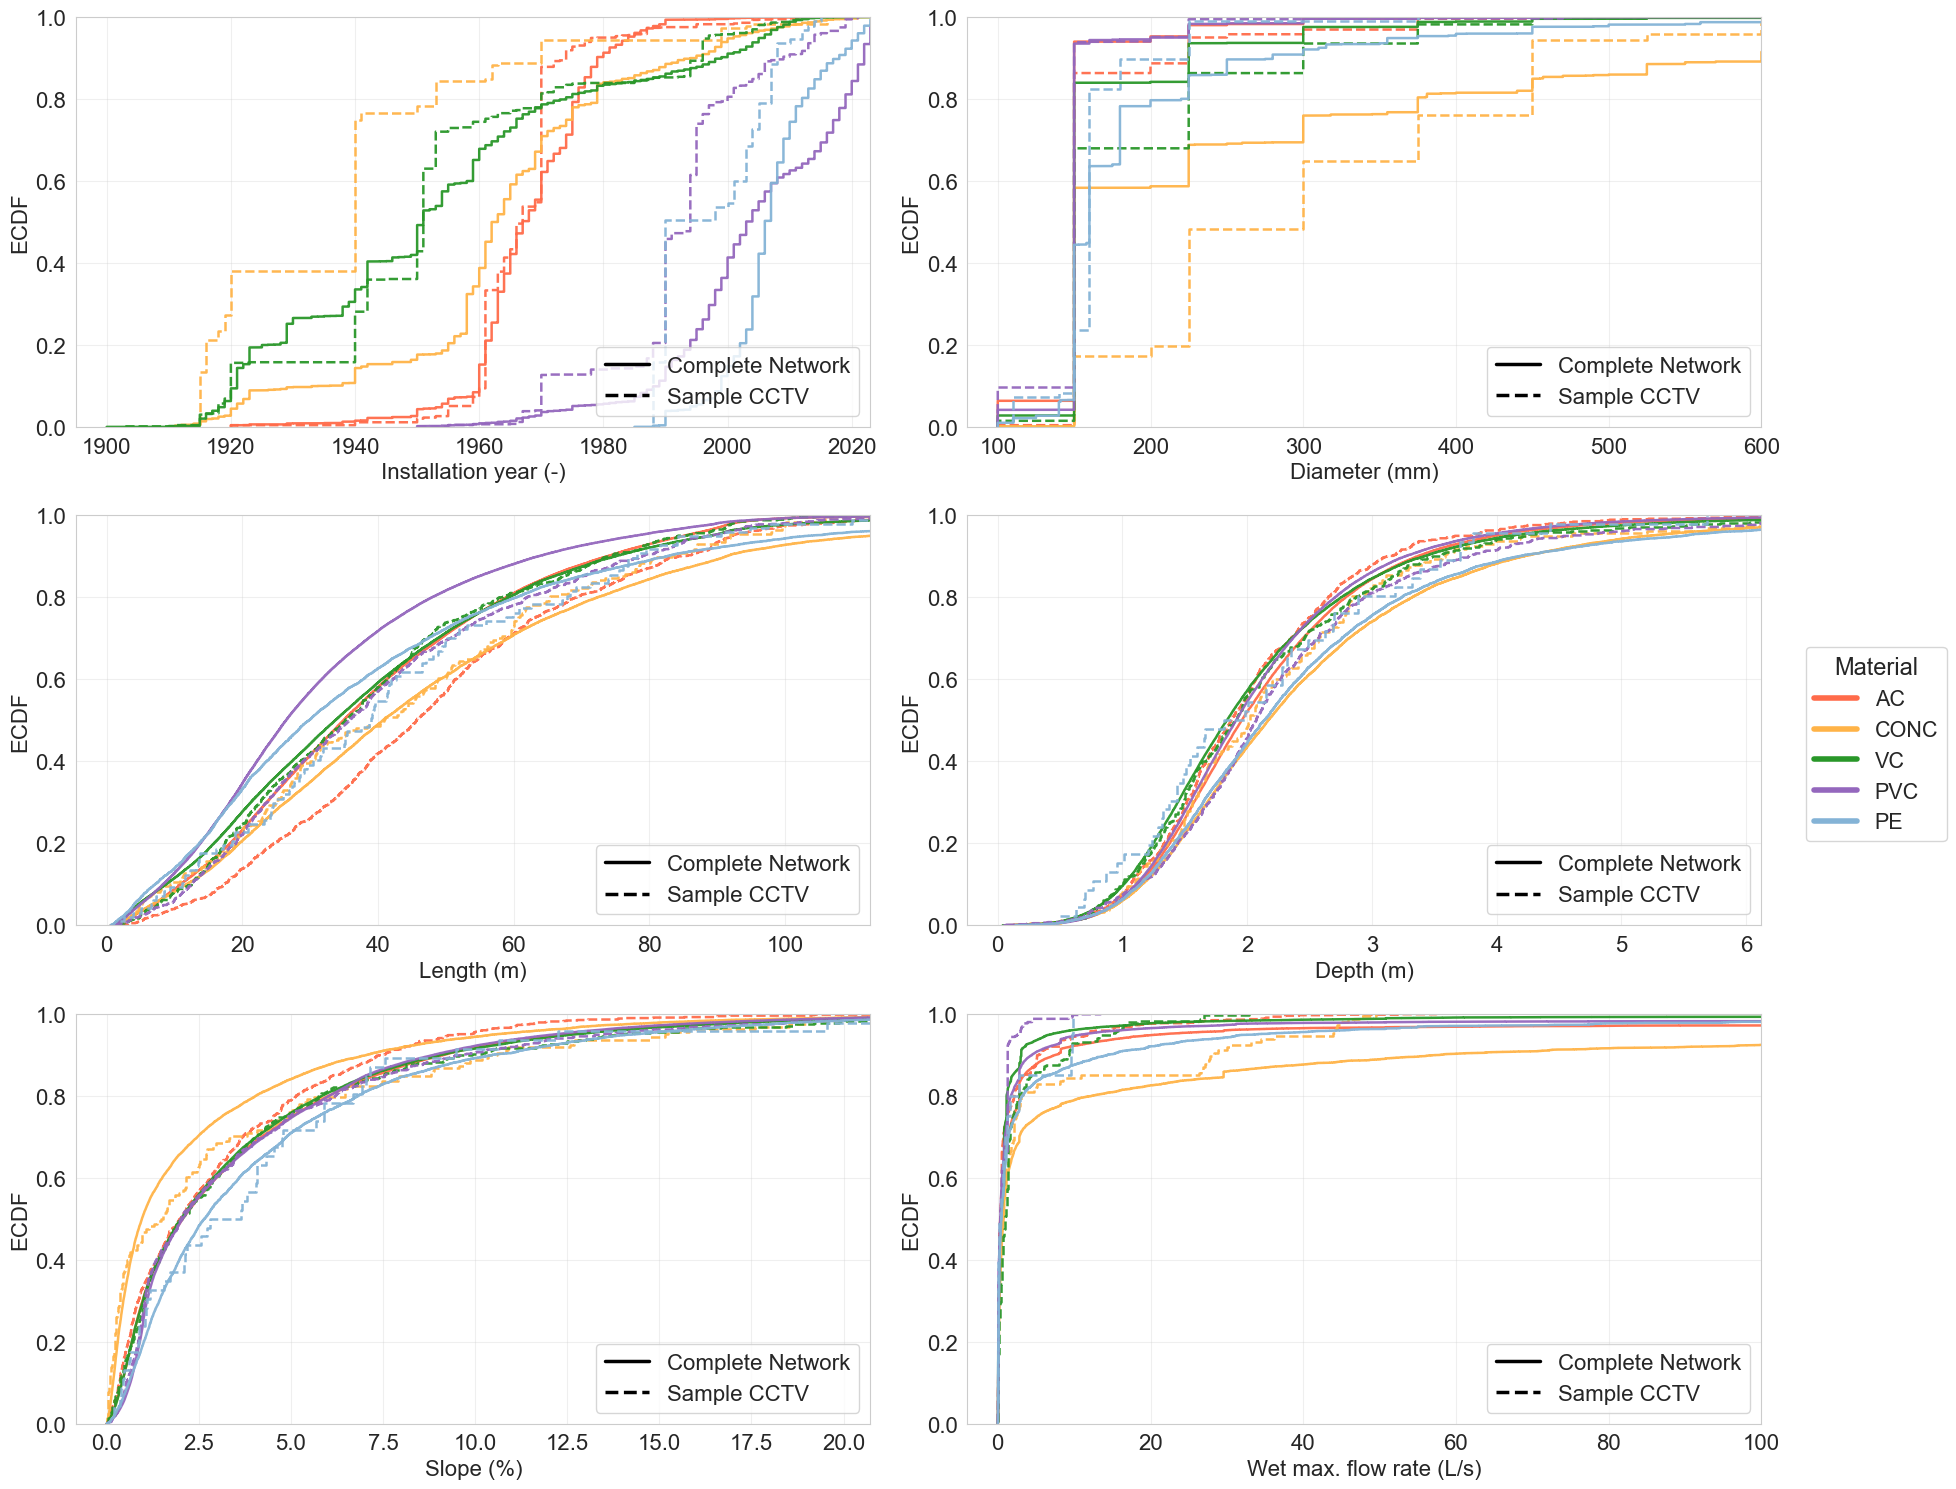

In [250]:
#--- Run the function---
summary_table = analyze_ecdf_by_material(
    df_population=df_pipes_filtered,
    df_sample=df_cctv_filtered,
    material_col="MATERIAL",
    numeric_cols=factors_num,
    materials=selected_materials,
    colors_materials=colors_materials
)
summary_table['Variable'] = pd.Categorical(
    summary_table['Variable'],
    categories=factors_num,
    ordered=True
)

summary_table = summary_table.sort_values('Variable')
summary_table.to_excel(output_dir / "Table_Probability_of_Superiority .xlsx", index=False)

## 4.3 Boxplots

This function creates **a boxplot for each numerical variable grouping the pipes by material**.

- **Required inputs**:
  - The `df_cctv_filtered` DataFrame (CCTV inspections filtered by selected materials).

- **Required columns**:
  - the columns that were selected in `factors_num`. → These are the variables that will be included in the boxplots.
  - `MATERIAL` → to group the pipes by material.

In [209]:
def plot_boxplots_grid(df, factors_num, group_col="MATERIAL"):
    """
    Plot boxplots for each numeric variable in factors_num grouped by group_col.
    The plots are arranged in a grid layout that adapts to the number of variables.

    Parameters
    ----------
    df : DataFrame
        The input DataFrame containing the data.
    factors_num : list of str
        List of numeric column names to plot.
    group_col : str, optional (default="MATERIAL")
        Column to use for grouping on the x-axis.
    """

    # --- Dictionary for nicer labels ---#
    labels_boxplot = {
        'INSTALL_YEAR': 'Installation year (-)',
        'DIAMETER': 'Diameter (mm)',
        'FLOW_WET_MAX': 'Wet max. flow rate (L/s)',
        'LENGTH': 'Length (m)',
        'AVG_DEPTH': 'Depth (m)',
        'SLOPE': 'Slope (%)',
    }

    if df is None or df.empty:
        raise ValueError("⚠️ The input DataFrame is empty or None.")
    if not factors_num:
        raise ValueError("⚠️ factors_num list is empty.")
    if group_col not in df.columns:
        raise ValueError(f"⚠️ Grouping column '{group_col}' not found in DataFrame.")
    for col in factors_num:
        if col not in df.columns:
            raise ValueError(f"⚠️ Column '{col}' from factors_num not found in DataFrame.")

    # --- Determine grid size (square-ish layout) ---#
    n_vars = len(factors_num)
    n_cols = math.ceil(math.sqrt(n_vars))
    n_rows = math.ceil(n_vars / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    # --- Create one boxplot per variable ---#
    for i, col in enumerate(factors_num):
        sns.boxplot(
            data=df,
            x=group_col,
            y=col,
            ax=axes[i],
            palette=colors_materials,
            order=selected_materials,
            width=0.8
        )

        # --- Remove legend for each subplot ---#
        if axes[i].get_legend():
            axes[i].legend_.remove()

        # --- Use label from dictionary or default to column name ---#
        y_label = labels_boxplot.get(col, col)
        axes[i].set_ylabel(y_label)  # --- Set y-axis label ---#
        axes[i].set_xlabel("")       # --- Remove x-axis label ---#
        axes[i].tick_params(axis="x", rotation=0)


    # --- Remove empty subplots if any ---#
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig(output_dir / "2.Boxplots.png", dpi=200, bbox_inches="tight")
    plt.show()

C:\Users\mgon869\AppData\Local\Temp\ipykernel_62708\2432044801.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mgon869\AppData\Local\Temp\ipykernel_62708\2432044801.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mgon869\AppData\Local\Temp\ipykernel_62708\2432044801.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\mgon869\AppData\Local\Temp\ipykernel_62708\2432044801.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

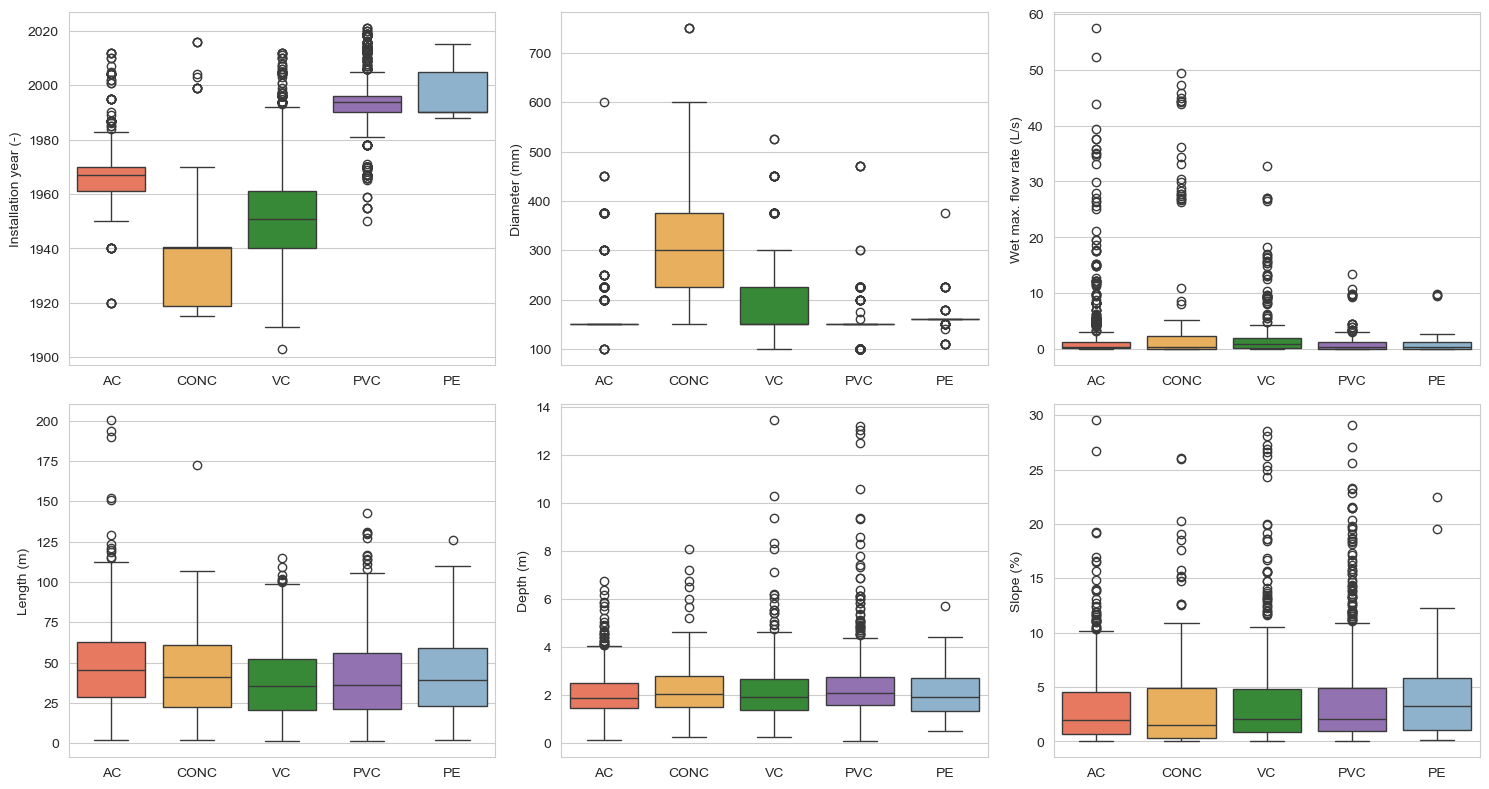

In [210]:
plot_boxplots_grid(df_cctv_filtered, factors_num, group_col="MATERIAL")

# Section 5: Defect Properties Analysis
__________________

In this section we shift the focus from the network description to the analysis of **defects** observed in the CCTV inspections.
The goals are:

- **Defects per kilometer and per pipe**
  - Calculate the density of defects normalized by pipe length.
  - Compare how defect rates vary across materials and pipe characteristics.

- **Defect properties**
  - Explore the distribution of defect attributes such as type, longitudinal distance, size, extent, and circumferential position.
  - Use visualizations to identify recurring patterns.

## 5.1. Number of defects per Km

This function calculates the **number of defects per kilometer of pipe**.

- **Required inputs**:
  - The `df_defects` DataFrame (defect-level data).
  - The `df_cctv_filtered` DataFrame (CCTV inspections filtered by selected materials).
  - The `selected_materials` list (materials chosen for analysis).

- **Required columns**:
  - `MATERIAL` → to group defects by pipe material.
  - `LENGTH` → to normalize the number of defects by pipe length (per km).

In [211]:
def plot_defects_per_km(df_defects, df_cctv_filtered, selected_materials, colors_dict,ax=None):
    """
    Plots the number of defects per kilometer for each pipe material.

    Parameters:
    -----------
    df_defects : DataFrame
        DataFrame containing defects. Must include 'MATERIAL' and 'DEFECTOS' columns.
    df_cctv_filtered : DataFrame
        DataFrame containing the inspected pipe lengths. Must include 'MATERIAL' and 'LENGTH' columns.
    selected_materials : list
        List specifying the order in which materials should appear on the x-axis.
    colors_dict : dict
        Dictionary mapping each material to a specific color for plotting.
    """
    #--- Check the information---
    if ax is None:
        _, ax = plt.subplots(figsize=(12,6))

    if df_defects is None or df_defects.empty:
        ax.text(0.5, 0.5, "⚠️ No defect data available", ha="center", va="center")
        ax.set_axis_off()
        return

    required_cols = {"MATERIAL", "LENGTH"}
    missing = required_cols - set(df_cctv_filtered.columns)
    if missing:
        ax.text(0.5, 0.5, f"⚠️ Missing columns: {', '.join(missing)}", ha="center", va="center")
        ax.set_axis_off()
        return

    if df_cctv_filtered is None or df_cctv_filtered.empty:
        ax.text(0.5, 0.5, "⚠️ No cctv data available", ha="center", va="center")
        ax.set_axis_off()
        return

    # ---Total inspected length per material (in meters)---
    length_by_material = df_cctv_filtered.groupby('MATERIAL')['LENGTH'].sum().reset_index(name='Unique_length')

    # --- Total number of defects per material (count rows)---
    defects_by_material = df_defects.groupby('MATERIAL', observed=False).size().reset_index(name='total_defects')

    # --- Merge both datasets on 'MATERIAL'---
    df_combined = pd.merge(defects_by_material, length_by_material, on='MATERIAL')

    # --- Calculate defects per kilometer ---
    df_combined['defects_per_km'] = df_combined['total_defects'] / (df_combined['Unique_length'] / 1000)

    #--- Set material order for plotting---
    df_combined['MATERIAL'] = pd.Categorical(df_combined['MATERIAL'], categories=selected_materials, ordered=True)

    plt.sca(ax)
    #--- Plot---
    sns.barplot(
        data=df_combined,
        x='MATERIAL',
        y='defects_per_km',
        hue='MATERIAL',
        palette=colors_dict
    )

    ax.set_xlabel('')
    ax.set_ylabel('Defects per km',fontsize=14)
    ax.set_title('(a) Average defects per km',fontsize=13)
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.3)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_ylim(0, 350)

    # --- Annotate each bar with the value---
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=12.5)
    return ax


## 5.2. Number of defects per pipe

This function calculates the **average number of defects per pipe**, grouped by material.

- **Required inputs**:
  - The `df_defects` DataFrame (defect-level data).
  - The `df_cctv_filtered` DataFrame (CCTV inspections filtered by selected materials).
  - The `selected_materials` list (materials chosen for analysis).

- **Required columns**:
  - `MATERIAL` → to group pipes and defects by material.
  - `PIPE_ID` (or equivalent) → to ensure that defects are counted per individual pipe.

In [212]:
def plot_defect_counts_per_pipe(df_defects, selected_materials, colors_dict,ax=None):
    """
    Plots the number of defects per pipe (average per pipe) grouped by material.

    Parameters:
    -----------
    df_defects : DataFrame
        A pandas DataFrame containing at least 'MATERIAL' and 'PIPE_ID' columns.
        Each row represents a defect.
    selected_materials : list
        List specifying the display order of materials on the x-axis.
    colors_dict : dict
        Dictionary mapping each material to a specific color.
    """

    if ax is None:
        _, ax = plt.subplots(figsize=(12,6))

    if df_defects is None or df_defects.empty:
        ax.text(0.5, 0.5, "⚠️ No defect data available", ha="center", va="center")
        ax.set_axis_off()
        return

    required_cols = {"MATERIAL", "PIPE_ID"}
    missing = required_cols - set(df_defects.columns)
    if missing:
        ax.text(0.5, 0.5, f"⚠️Missing columns: {', '.join(missing)}", ha="center", va="center")
        ax.set_axis_off()
        return

    # ---Count defects per pipe ---
    defects_per_pipe = df_defects.groupby(['PIPE_ID','MATERIAL']).size().reset_index(name='defect_count')

    # --- Average (or median) defects per pipe grouped by material ---
    df_group = defects_per_pipe.groupby('MATERIAL')['defect_count'].mean().reset_index()

    if ax is None:
        _, ax = plt.subplots(figsize=(12,6))
    plt.sca(ax)

    # --- Plot ---
    sns.barplot(
        data=df_group,
        x='MATERIAL',
        y='defect_count',
        hue='MATERIAL',
        order=selected_materials,
        palette=colors_dict,
        legend=False
    )

    #--- Style ---
    ax.set_xlabel('')
    ax.set_ylabel('Defects per pipe',fontsize=14)
    ax.set_title('(b) Average defects per pipe',fontsize=13)
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.3)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # --- Value labels---
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=12.5)
    return ax

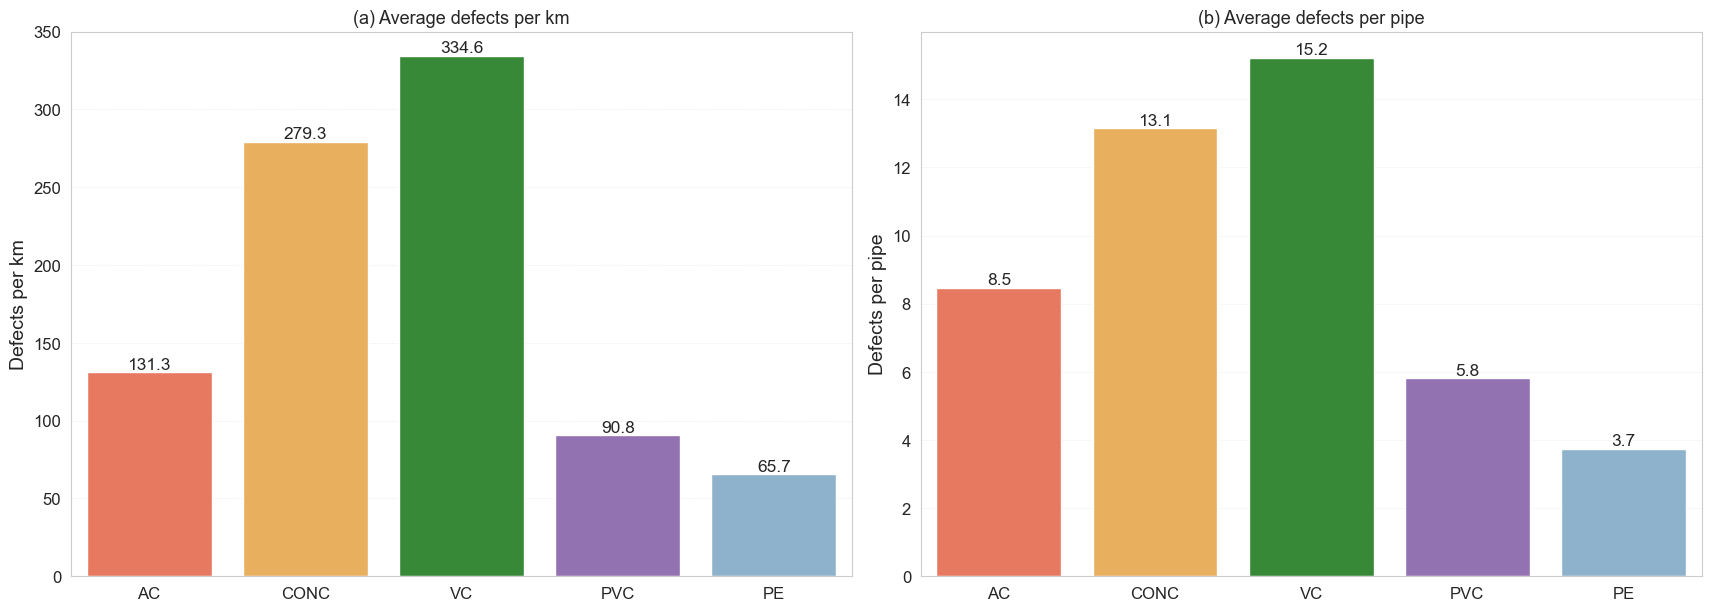

In [213]:
#--- Plot defects per km and defects per pipe ---
def show_error(ax, msg):
    ax.clear()
    ax.text(0.5, 0.5, msg, ha="center", va="center", fontsize=12)
    ax.set_axis_off()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(17, 6), constrained_layout=True)

try:
    # --- inside plot_defects_per_km, validate inputs (df exists, required cols, etc.) ---
    plot_defects_per_km(df_defects, df_cctv_filtered, selected_materials, colors_materials, ax=ax0)
except Exception as e:
    show_error(ax0, f"plot_defects_per_km failed:\n{e}")

try:
    # --- inside plot_defect_counts_per_pipe, validate (df exists, required cols incl. MATERIAL, PIPE_ID)---
    plot_defect_counts_per_pipe(df_defects, selected_materials, colors_materials, ax=ax1)
except Exception as e:
    show_error(ax1, f"plot_defect_counts_per_pipe failed:\n{e}")

plt.savefig(output_dir / "3.Number_per_pipe_&_per_km.png", dpi=200, bbox_inches="tight")
plt.show()

## 5.3. Type of Defects- Percentage Distribution

This function analyzes the **distribution of defect types across materials**.

- **Required inputs**:
  - The `df_defects` DataFrame (defect-level data).

- **Required columns**:
  - `DEFECT_TYPE` → the main defect type identifier.
  - `MATERIAL` → to group defect types by pipe material.

### Table of Defect Types

To understand the characteristics and different types of defects, the following table provides a summary of defect codes, their descriptions, and the related properties.

| Code | Defect name | Description | SZ. | E. | C.L. |
|:-----|:-------------|:-------------|:----:|:----:|:----:|
| BDE | Pipe Blocked (with debris) | Deposits of silt, sand, mud, or gravel in the pipe that reduces the diameter in more than 50%. |  |  |  |
| CC | Cracking Circumferential | Cracking at right angles to the pipe axis. | X |  | X |
| CL | Cracking Longitudinal | Cracking parallel to the pipe axis. | X | X | X |
| CM | Cracking Multiple | Cracking in multiple directions. | X | X | X |
| DE | Debris Silty | Deposits of silt, sand, mud, or gravel in the pipe. | X | X | X |
| DF | Deformed Pipe | Deformation in rigid pipe. | X | X | X |
| DG | Debris Greasy | Fat, scale, and other adhering material. | X | X | X |
| DP | Dipped Pipe | Sag in the pipe causing water to pond. | X | X | X |
| ED | Encrustation Deposits | Deposits from evaporated groundwater with dissolved salts/minerals. | X | X | X |
| EX | Exfiltration | Visible flow of water out of the pipe. |  |  |  |
| IP | Infiltration Present | Visible infiltration through a pipe defect. | X |  | X |
| JD | Joint Displaced | Pipe segments have a vertical or horizontal displacement relative to each other. | X |  |  |
| JF | Joint Faulty | Sealing or physical joint defects. | X |  | X |
| JO | Joint Open | Pipe segments are displaced longitudinally. | X |  |  |
| LF | Lateral Faulty | Joint sealing defects or physical damage to lateral connections. | X |  |  |
| LP | Lateral Protruding | Pipe is protruding into the inspected pipe. | X |  |  |
| LX | Lateral Problem | Defects in the lateral pipe. |  |  |  |
| MHJ | Manhole Joint Faulty | The bond between the pipe and manhole is faulty. |  |  | X |
| OP | Obstruction Permanent | Fixed object causing obstruction. | X |  | X |
| OT | Obstruction Temporary | Potentially removable obstruction. | X |  | X |
| PB | Pipe Broken | Pipe broken into blocks by cracks forming a mosaic pattern. | X | X | X |
| PF | Deformed Plastic Pipe | Deformation in plastic pipe. | X | X | X |
| PH | Pipe Holed | Hole made in the pipe. | X |  | X |
| PL | Protective Lining Defective | The lining of a pipe is defective. | X | X | X |
| PX | Pipe Collapsed | Complete structural failure. | X |  |  |
| RI | Root Intrusion | Tree roots entering the pipe through a defect. |  | X | X |
| SD | Surface Damage | Damage in the inside surface of the pipe. | X | X | X |
| SV | Soil Visible | The soil is visible through a defect. |  |  | X |
| TM | Tomo | Cavity outside the pipe is visible through a defect. |  |  | X |


In [214]:
def prepare_defect_data(df_defects, threshold=None):
    """
    Prepares defect data for plotting.
    Splits defects into those >= threshold and those < threshold.
    Returns pivot tables for both cases.

    Parameters
    ----------
    df : pandas.DataFrame
        Long-format table with (at least) columns:
          - 'MATERIAL'   : material/category of the pipe
          - 'DEFECT_TYPE'  : defect code/name
          - 'DEFECTOS'   : count of defects (numeric)
    threshold : float, default 10
        Minimum percentage (0–100) a defect must contribute within a material
        to be treated as "frequent" (and get its own column in df_keep_pivot).

    Returns
    -------
    df_keep_pivot : pandas.DataFrame
        Wide table (MATERIAL × {frequent defects + 'Others'}) with percentages
        that sum to ~100% by row (subject to data completeness).
    df_rare_pivot : pandas.DataFrame
        Wide table (MATERIAL × rare defects) with percentages *within the rare subset*
        that sum to ~100% by row only for materials that have rare defects.
    """

    # --- validate ---
    if df_defects is None or not isinstance(df_defects, pd.DataFrame) or df_defects.empty:
        raise ValueError("Defects DataFrame is missing or empty.")
    required = {"MATERIAL", "DEFECT_TYPE"}
    missing = required - set(df_defects.columns)
    if missing:
        raise ValueError(f"⚠️ Missing required columns: {sorted(missing)}")

    df = df_defects[df_defects["MATERIAL"].notna() & df_defects["DEFECT_TYPE"].notna()].copy()
    if df.empty:
        raise ValueError("⚠️ No rows with non-null MATERIAL and DEFECT_TYPE after filtering.")

    # --- counts per (MATERIAL, DEFECT_TYPE) ---
    g = (df.groupby(["MATERIAL", "DEFECT_TYPE"], observed=False)
           .size().reset_index(name="count"))
    g = g[~g["DEFECT_TYPE"].astype(str).str.fullmatch(r"\d+")].copy()

    if threshold is None:
        totals = g.groupby("MATERIAL", observed=False)["count"].transform("sum")
        g["defect_percentage"] = g["count"] / totals * 100

        g["MATERIAL"] = pd.Categorical(g["MATERIAL"], categories=selected_materials, ordered=True)
        g = g.sort_values("MATERIAL")
        df_keep_pivot = (g.pivot(index="MATERIAL", columns="DEFECT_TYPE", values="defect_percentage")
                           .fillna(0))
        df_keep_pivot = df_keep_pivot.loc[:, df_keep_pivot.sum().sort_values(ascending=False).index]
        df_rare_pivot = pd.DataFrame(index=df_keep_pivot.index)
        return df_keep_pivot, df_rare_pivot

    # --- threshold path---
    g["total"] = g.groupby("MATERIAL", observed=False)["count"].transform("sum")
    g["defect_percentage"] = g["count"] / g["total"] * 100

    g["MATERIAL"] = pd.Categorical(g["MATERIAL"], categories=selected_materials, ordered=True)
    g = g.sort_values("MATERIAL")

    keep_df = g[g["defect_percentage"] >= float(threshold)].copy()
    rare_df = g[g["defect_percentage"] <  float(threshold)].copy()

    df_keep_pivot = (keep_df.pivot(index="MATERIAL", columns="DEFECT_TYPE", values="defect_percentage")
                       .fillna(0))
    #--- add Others---
    if not rare_df.empty:
        others_sum = rare_df.groupby("MATERIAL", observed=False)["defect_percentage"].sum()
        df_keep_pivot["Others"] = others_sum
    else:
        df_keep_pivot["Others"] = 0.0

    df_keep_pivot = df_keep_pivot.loc[:, df_keep_pivot.sum().sort_values(ascending=False).index]

    rare_df["others_total"] = rare_df.groupby("MATERIAL", observed=False)["count"].transform("sum")
    rare_df["defect_percentage_others"] = rare_df["count"] / rare_df["others_total"] * 100
    df_rare_pivot = (rare_df.pivot(index="MATERIAL", columns="DEFECT_TYPE", values="defect_percentage_others")
                           .fillna(0))

    return df_keep_pivot, df_rare_pivot


In [215]:
def plot_defects_stacked_with_others(
    df,
    threshold=2.5,
    color=None,
    label_min_top=0.5,            # min % to label on TOP chart
    label_min_bottom=0.25,         # min % to label on BOTTOM chart
    bottom_max_labels_per_bar=16, # max labels per bar on BOTTOM (None = unlimited)
    show_legend=False,
):
    """
    Creates two 100% stacked bar charts:
      1) TOP: Shows defect types with >= threshold; 'Others' is forced last and hatched; only large segments (>= label_min_top) are labeled.
      2) BOTTOM: Shows defect types with < threshold; columns sorted by total (descending); only large segments (>= label_min_bottom) are labeled,
         capped at bottom_max_labels_per_bar per bar. Bars are not hidden.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing defect data, typically with rows as samples or groups and columns as defect types or categories.
        Expected to be in a format suitable for pivoting into percentages (e.g., counts or proportions of defects per category).
        Processed by `prepare_defect_data` to split into common and rare defects.
    threshold : float, default 2.5
        Percentage threshold to separate defect types into common (>= threshold, shown in top chart) and rare (< threshold, shown in bottom chart).
        Defects below this threshold are grouped into 'Others' in the top chart or displayed individually in the bottom chart.
    material_order : list or None, default None
        Optional list specifying the order of categories (e.g., materials) for the x-axis of both charts.
        If None, the order is determined by the data or helper function (e.g., alphabetical or by total).
    color : dict or None, default None
        Optional dictionary mapping defect types to colors for the stacked bars.
        If None, Matplotlib's default color cycle is used.
    label_min_top : float, default 6.0
        Minimum percentage height for a segment in the top chart to be labeled.
        Ensures only significant segments (>= 6.0%) are annotated to avoid clutter.
    label_min_bottom : float, default 2.0
        Minimum percentage height for a segment in the bottom chart to be labeled.
        Ensures only significant rare defect segments (>= 2.0%) are annotated.
    bottom_max_labels_per_bar : int or None, default 10
        Maximum number of labels per bar in the bottom chart. Limits the number of rare defect types labeled to avoid overcrowding.
        If None, no limit is applied.
    show_legend : bool, default False
        If True, displays a legend with all defect types in the order they appear, with 'Others' last.
        If False, no legend is shown to reduce visual clutter.
    """
    # --- Prepare data ---
    df_keep_pivot, df_rare_pivot = prepare_defect_data(df, threshold)
    color_map = color or {}

    # ---------------- Helpers ----------------
    def _move_others_last(pvt):
        if pvt is None or pvt.empty or 'Others' not in pvt.columns:
            return pvt
        cols = [c for c in pvt.columns if c != 'Others'] + ['Others']
        return pvt[cols]

    def _order_cols_desc_total(pvt):
        """Order columns by total (descending)."""
        if pvt is None or pvt.empty:
            return pvt
        totals = pvt.sum(axis=0).sort_values(ascending=False)
        return pvt[list(totals.index)]

    def _hatch_others(ax_plot, pivot_df):
        if pivot_df is None or pivot_df.empty or 'Others' not in pivot_df.columns:
            return
        cols = list(pivot_df.columns)
        j = cols.index('Others')
        n_bars = len(pivot_df.index)
        for i in range(n_bars):
            idx = j * n_bars + i
            if idx < len(ax_plot.patches):
                p = ax_plot.patches[idx]
                p.set_hatch('///')
                p.set_edgecolor('k')
                p.set_linewidth(0.6)

    def _label_outside_right_select(ax_plot, pivot_df, *,
                                    min_h=3.0,
                                    max_labels_per_bar=None,
                                    dx_frac=0.05,
                                    dy_min=1.2,
                                    fontsize=8,
                                    skip=()):
        """
        Label only some segments per bar:
          - Only segments with height > 0 AND >= min_h (strictly positive to avoid ghost labels).
          - If max_labels_per_bar is set, keep top-K (by height) per bar.
          - Place text to the right with a minimum vertical separation (dy_min).
        """
        if pivot_df is None or pivot_df.empty:
            return
        n_rows = len(pivot_df.index)
        patches = ax_plot.patches
        ax_plot.margins(x=0.18)  # room for labels

        for i in range(n_rows):
            # candidates for this bar
            cand = []
            for j, col in enumerate(pivot_df.columns):
                if col in skip:
                    continue
                idx = j * n_rows + i
                if idx >= len(patches):
                    continue
                p = patches[idx]
                h = p.get_height()
                if h > 0 and h >= min_h:   # *** strictly positive ***
                    cand.append((h, p, col))

            if not cand:
                continue

            # top-K by height if requested
            cand.sort(key=lambda t: t[0], reverse=True)
            if max_labels_per_bar is not None:
                cand = cand[:max_labels_per_bar]

            # sort by vertical position to avoid overlaps
            cand = sorted(
                [(p.get_y() + p.get_height()/2.0, p, col) for _, p, col in cand],
                key=lambda t: t[0]
            )

            last_y = -1e9
            for y_mid, p, col in cand:
                if y_mid - last_y < dy_min:
                    y_mid = last_y + dy_min
                last_y = y_mid

                x_text = p.get_x() + p.get_width() + (p.get_width() * dx_frac)
                ax_plot.text(
                    x_text, y_mid, str(col),
                    ha='left', va='center', fontsize=fontsize, color='black',
                    clip_on=False,
                    bbox=dict(boxstyle='round,pad=0.12', facecolor='white', alpha=0.65, edgecolor='none'),
                    path_effects=[pe.withStroke(linewidth=1.2, foreground='white', alpha=0.9)]
                )

    # ---------------- Pivots ----------------
    # TOP: move Others to the end
    df_keep_pivot = _move_others_last(df_keep_pivot)

    # BOTTOM: strictly sort defects by total (descending)
    if not df_rare_pivot.empty:
        df_rare_pivot = _order_cols_desc_total(df_rare_pivot)
    # ---------------- Plot ----------------
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16), sharex=True,
                                   gridspec_kw={'height_ratios': [1, 1.25]})

    # ---- TOP ----
    try:
        df_keep_pivot.plot(kind='bar', stacked=True, ax=ax1, color=color_map)
        ax1.set_title(f'Fraction of Defect Types', fontsize=15)
        ax1.set_ylabel('Percentage (%)', fontsize=13)
        ax1.set_ylim(0, 100)
        ax1.grid(axis='y', linestyle='--', alpha=0.7)
        ax1.tick_params(axis='x', rotation=0, labelsize=13.5)
        ax1.tick_params(axis='y', labelsize=13.5)
        _hatch_others(ax1, df_keep_pivot)
        if not show_legend and ax1.get_legend() is not None:
            ax1.legend_.remove()

        # label big segments
        _label_outside_right_select(ax1, df_keep_pivot,
                                    min_h=label_min_top,
                                    max_labels_per_bar=None,
                                    dx_frac=0.04, dy_min=1.4,
                                    fontsize=11,
                                    skip=())

        # ---- BOTTOM ----
        if not df_rare_pivot.empty:
            df_rare_pivot.plot(kind='bar', stacked=True, ax=ax2, color=color_map)
            ax2.set_title(f'Fraction of "Others"', fontsize=15)
            ax2.set_ylabel('Percentage (%)', fontsize=13)
            ax2.set_xlabel('')
            ax2.grid(axis='y', linestyle='--', alpha=0.7)
            ax2.set_ylim(0, 100)
            ax2.tick_params(axis='x', rotation=0, labelsize=13.5)
            ax2.tick_params(axis='y', labelsize=13.5)
            if not show_legend and ax2.get_legend() is not None:
                ax2.legend_.remove()
            _label_outside_right_select(ax2, df_rare_pivot,
                                        min_h=label_min_bottom,
                                        max_labels_per_bar=bottom_max_labels_per_bar,
                                        dx_frac=0.04, dy_min=1.7,
                                        fontsize=11,
                                        skip=())
        else:
            ax2.set_visible(False)

        # Optional legend
        if show_legend:
            cols_top = list(df_keep_pivot.columns)
            cols_bottom = list(df_rare_pivot.columns) if not df_rare_pivot.empty else []
            legend_order, seen = [], set()
            for c in cols_top + cols_bottom:
                if c not in seen:
                    seen.add(c); legend_order.append(c)
            if 'Others' in legend_order:
                legend_order = [c for c in legend_order if c != 'Others'] + ['Others']
            handles = []
            for d in legend_order:
                patch = Patch(facecolor=color_map.get(d, '#cccccc'), label=d)
                if d == 'Others':
                    patch.set_hatch('///'); patch.set_edgecolor('k'); patch.set_linewidth(0.6)
                handles.append(patch)
            fig.legend(handles, legend_order, title='Defect Type',
                       loc='upper right', bbox_to_anchor=(0.99, 0.99),
                       ncol=1, fontsize=12.5, title_fontsize=12)

        plt.tight_layout(rect=[0.02, 0.02, 0.98, 0.96])
        plt.savefig(output_dir / "4.Type_defects.png", dpi=200, bbox_inches="tight")
        plt.show()
    except ValueError as e:
        print(f"⚠️ Cannot generate stacked plot: {e}")# Handle plotting errors

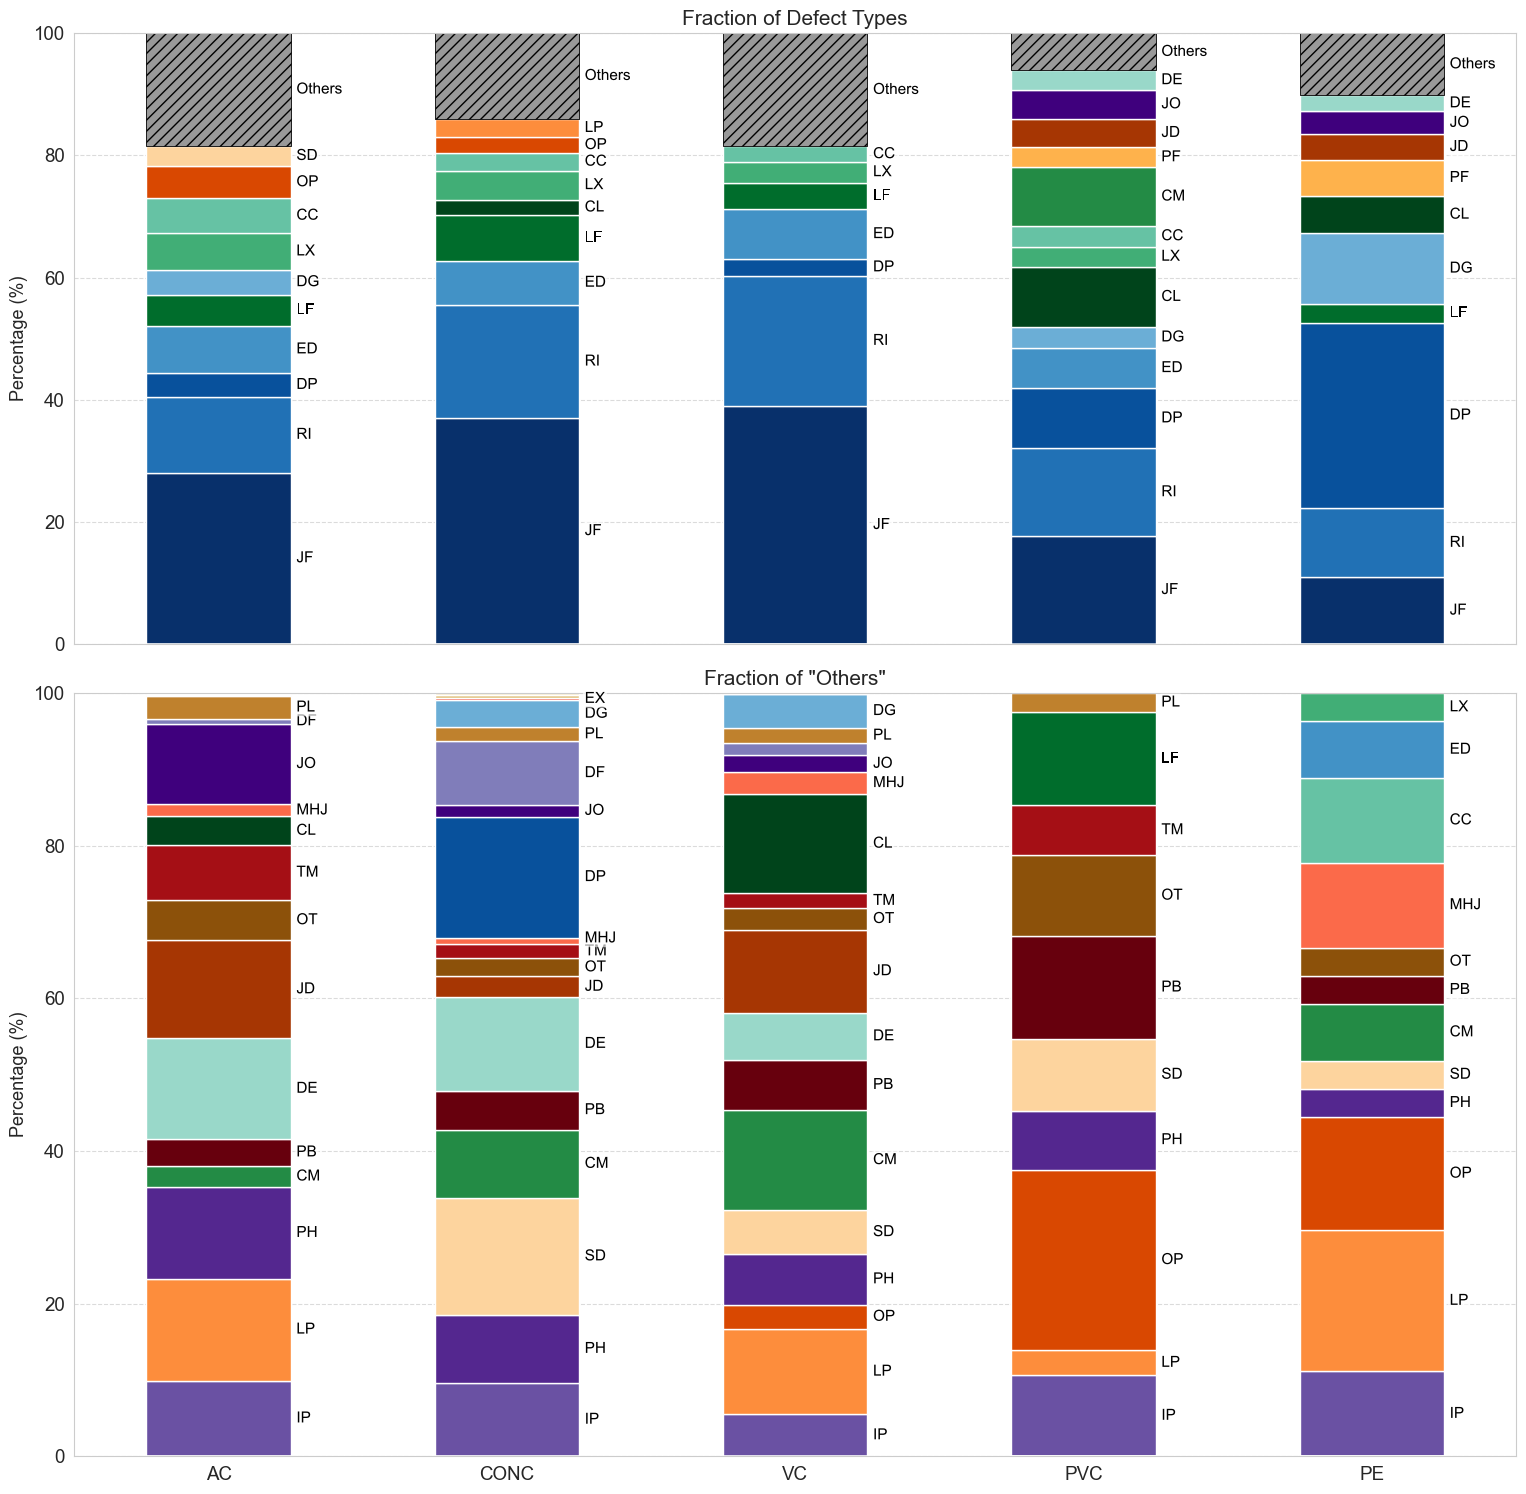

In [216]:
plot_defects_stacked_with_others(df_defects,threshold=2.5, color=palette_defects_final)

## 5.4. Size

This function analyzes the distribution of the**size of the defects types**

- **Required inputs**:
  - The `df_defects` DataFrame (defect-level data).

- **Required columns**:
  - `DEFECT_TYPE` → the main defect type identifier.
  - `DEFECT_SIZE` → the size of the defects. For this function it must be S, M, or L.
  - `MATERIAL`→ to group the defects.

- **Additional parameter**:
  - `materials` → they are the materials to be included in the analysis. By default is `selected_materials`.
  - `min_count` → the minimum number of defects of a given type required
    for it to be included in the heatmap.
  - `exclude_defects` → they are the defects to be excluded from the analysis. By default, TM and PX are included because they are not recorded with a size according to New Zealand regulations.

In [217]:
def plot_defect_size_bars_(df, materials=selected_materials, valid_sizes=['S','M','L'], min_count=15, exclude_defects=None):
    """
    Plots horizontal stacked bar charts of defect sizes for multiple pipe materials.
    Each material is displayed in a separate subplot, arranged in a single row.
    Bars are stacked without gaps, showing the percentage of each defect size (S, M, L).
    Defects with insufficient data are shown in gray.

    Parameters
    ----------
    df : DataFrame
        A pandas DataFrame containing at least the columns 'MATERIAL', 'DEFECT_SIZE' (defect size),
        and 'DEFECT_TYPE' (defect type).
    materials : list
        List of material names to include in the plots.
    valid_sizes : list, optional (default=['S','M','L'])
        List of defect sizes to be included in the stacked bars.
    min_count : int, optional (default=15)
        Minimum number of defects required for a defect type to be considered valid.
        Defects with fewer occurrences are marked in gray.
    exclude_defects : list, optional (default=['TM','PX'])
        List of defect types to exclude from the analysis.
    """

    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    # --- Fixed style parameters ---
    figsize = (8, 6)
    title_size = 12
    label_size = 12

    # --- Validate input dataframe ---
    if df is None or not isinstance(df, pd.DataFrame):
        raise ValueError("Input must be a valid pandas DataFrame.")

    # --- Validate required columns ---
    required_columns = ['MATERIAL', 'DEFECT_SIZE', 'DEFECT_TYPE']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"⚠️ Column '{col}' is missing from the DataFrame.")

    # --- Copy and filter dataframe ---
    df_filt = df.copy()
    df_size = df_filt[df_filt['DEFECT_SIZE'].isin(valid_sizes)]
    if exclude_defects is None:
        exclude_defects = ['TM','PX']
    df_size = df_size[~df_size['DEFECT_TYPE'].isin(exclude_defects)]
    order_defects_size = df_size['DEFECT_TYPE'].value_counts().index.tolist()

    # --- Create subplots (1 row, N columns for N materials) ---
    n = len(materials)
    fig, axes = plt.subplots(1, n, figsize=figsize, sharey=True)
    if n == 1:
        axes = [axes]

    all_handles, all_labels = [], []

    # --- Iterate over materials and build plots ---
    for i, material in enumerate(materials):
        df_mat = df_size[df_size['MATERIAL'] == material]

        # --- Group by defect type and size, calculate percentage ---
        count_df = df_mat.groupby(['DEFECT_TYPE','DEFECT_SIZE']).size().reset_index(name='count')
        total_counts = count_df.groupby('DEFECT_TYPE')['count'].transform('sum')
        count_df['percentage'] = (count_df['count'] / total_counts) * 100

        pivot_df = count_df.pivot(index='DEFECT_TYPE', columns='DEFECT_SIZE', values='percentage').fillna(0)
        pivot_df = pivot_df.reindex(columns=valid_sizes)

        # --- Determine valid and invalid defect types ---
        defect_totals = df_mat['DEFECT_TYPE'].value_counts()
        valid_defects = defect_totals[defect_totals >= min_count].index
        invalid_defects = defect_totals[defect_totals < min_count].index

        # --- Add missing defects with zeros ---
        missing_defects = [d for d in order_defects_size if d not in pivot_df.index]
        missing_df = pd.DataFrame(0, index=missing_defects, columns=valid_sizes + ['gray'])
        full_df = pd.concat([pivot_df, missing_df])
        full_df = full_df.loc[order_defects_size[::-1]]

        # --- Mark invalid/missing defects as gray ---
        full_df['gray'] = 0
        full_df.loc[invalid_defects, ['gray']] = 100
        full_df.loc[missing_defects, ['gray']] = 100
        full_df.loc[invalid_defects, valid_sizes] = 0

        # --- Prepare dataframe for plotting ---
        full_df_plot = full_df[valid_sizes + ['gray']]

        # --- Plot horizontal stacked bars ---
        ax = axes[i]
        full_df_plot.plot(kind='barh', stacked=True,
                          color=['#ffe5b4','#ffb347','#ff7f0e','lightgray'],
                          ax=ax, legend=False)

        # --- Remove gaps between bars ---
        for bar in ax.patches:
            bar.set_height(1.0)

        # --- Configure axes ---
        ax.set_yticks(np.arange(len(full_df)))
        ax.set_yticklabels(full_df.index, fontsize=10, va='center')
        ax.set_xlim(0,100)
        ax.set_ylim(-0.2, len(full_df)-0.2)
        ax.set_title(material, fontsize=title_size)

        # --- Collect legend handles and labels ---
        if i == 0:
            all_handles = [plt.Rectangle((0,0),1,1,color=c) for c in ['#ffe5b4','#ffb347','#ff7f0e','lightgray']]
            all_labels = ['S','M','L','Insufficient data (n < 15)']

    # --- Add shared legend ---
    fig.legend(all_handles, all_labels, title='Defect Size', loc='upper center',
               bbox_to_anchor=(0.5, 1.08), ncol=4)

    # --- Add shared axis labels ---
    fig.text(0.04, 0.5, 'Defect type', va='center', rotation='vertical', fontsize=label_size)
    fig.text(0.5, -0.03, 'Percentage (%)', ha='center', va='center', fontsize=label_size)

    # --- Adjust layout and show plot ---
    plt.tight_layout(rect=[0.06,0,1,0.98])
    plt.savefig(output_dir / "5.Size.png", dpi=200, bbox_inches="tight")
    plt.show()

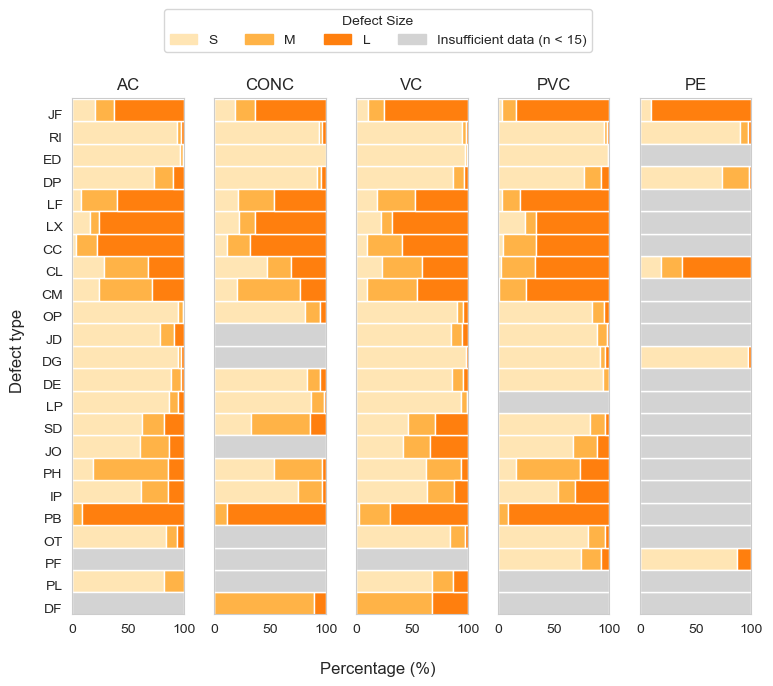

In [218]:
plot_defect_size_bars_(df=df_defects)

## 5.5 Longitudinal Distance

This function analyzes the **longitudinal position of defects** along the pipe,
normalized by pipe length. The results are visualized as a heatmap.

- **Required inputs**:
  - The `df_defects` DataFrame (defect-level data).

- **Required columns**:
  - `DEFECT_TYPE` → the main defect type identifier.
  - `LONGITUDINAL_DISTANCE_NORMALIZED` → the normalized longitudinal distance of the defect
    (defect position along the pipe divided by the pipe length).

- **Additional parameter**:
  - `min_count` → the minimum number of defects of a given type required
    for it to be included in the heatmap.

In [219]:
def plot_defect_heatmaps_longitudinal(
    df,
    group_col='DEFECT_TYPE',
    distance_col='LONGITUDINAL_DISTANCE_NORMALIZED',
    min_count=0
):
    """
    Plot heatmaps of longitudinal distance for multiple materials in a single row.

    Parameters
    ----------
    df : pandas.DataFrame
        Long-format table of defect observations. Must contain at least:
        - 'MATERIAL' (material/category),
        - the grouping column given by `group_col` (default 'DEFECT_TYPE'),
        - the longitudinal distance column given by `distance_col` (default 'LONG_DIS_NO'),

    group_col : str, default 'DEFECT_TYPE'
        Column name with the defect type used as the heatmap row index.

    distance_col : str, default 'LONG_DIS_NO'
        Column name with defect position along the pipe (0–1). It will be converted to percent
        and binned into 0–10–…–100% intervals for the x-axis.

    min_count : int, default 0
        Minimum number of observations for a defect **within each material**. Rows below this
        threshold are rendered in gray (marked as “no data” for that facet).
    """
    if df is None or not isinstance(df, pd.DataFrame) or df.empty:
        print ("⚠️ Input DataFrame is missing or empty.")
        return
    required = {"MATERIAL", group_col, distance_col}
    missing = required - set(df.columns)
    if missing:
        print(f"⚠️ Missing required columns: {sorted(missing)}")
        return


    #--- Copy and build percentage position bins---
    df = df.copy()
    df['LD_PERC'] = df[distance_col] * 100
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    df['LD_PERC_BIN'] = pd.cut(df['LD_PERC'], bins=bins, right=False, include_lowest=True)
    bin_labels = [f"{int(b.left)}-{int(b.right)}" for b in df['LD_PERC_BIN'].cat.categories]

    defect_order = df[group_col].value_counts().index.tolist()
    if len(defect_order) == 0:
        raise ValueError("No defect types found in the DataFrame.")

    #--- Build a colormap with an extra gray color for rows failing the min_count threshold---
    base_cmap = plt.get_cmap("Blues", 256)
    base_colors = base_cmap(np.linspace(0, 1, 256))
    gray_color = np.array([[0.85, 0.85, 0.85, 1.0]])
    all_colors = np.vstack([base_colors, gray_color])
    final_cmap = ListedColormap(all_colors)
    bounds = np.concatenate([np.linspace(0, 1, 256), [998, 1000]])
    norm = BoundaryNorm(boundaries=bounds, ncolors=257)

    #--- One subplot per material, sharing the y-axis (defect rows)---
    fig, axes = plt.subplots(1, len(selected_materials), figsize=(15, 9), sharey=True,constrained_layout=True)
    if len(selected_materials) == 1:
        axes = np.array([axes])

    #--- Keep a valid heatmap handle for the colorbar---
    hm_for_cbar = None

    for i, (material, ax) in enumerate(zip(selected_materials, axes)):
        df_mat = df[df['MATERIAL'] == material].copy()

        if df_mat.empty:
            ax.axis('off')
            ax.set_title(f"{material}\n(no data)")
            continue

        #--- Frequency table by defect × longitudinal bin---
        freq = df_mat.groupby([group_col, 'LD_PERC_BIN'], observed=False).size().reset_index(name='FREQ')
        table = freq.pivot(index=group_col, columns='LD_PERC_BIN', values='FREQ').fillna(0)

        #--- Keep only the desired defects (after excluding the last N)---
        table = table.reindex(index=defect_order, fill_value=0)

        #--- Row-wise normalization to [0, 1]---
        table_norm = table.div(table.max(axis=1).replace(0, np.nan), axis=0).fillna(0)

        #--- Mark rows with insufficient sample size in this material with the gray code (999)---
        defect_counts = df_mat[group_col].value_counts().to_dict()
        for defect in defect_order:
            if defect_counts.get(defect, 0) < min_count:
                table_norm.loc[defect] = 999

        #--- Apply row order and rename columns with bin labels---
        table_norm = table_norm.reindex(defect_order)
        table_norm.columns = bin_labels

        #--- Plot the heatmap for this material---
        if table_norm.empty:
            ax.axis('off')
            ax.set_title(f"{material}\n(no eligible defects)")
            continue

        hm = sns.heatmap(
            table_norm,
            cmap=final_cmap,
            norm=norm,
            vmin=0,
            vmax=1,
            ax=ax,
            cbar=False,
            annot=False,
            fmt=".0f",
            linewidths=0,
            linecolor='gray'
        )
        hm_for_cbar = hm

        ax.set_title(material,fontsize=13)
        ax.set_xlabel("")
        ax.set_xticks(np.arange(len(bin_labels)) + 0.5)
        ax.set_xticklabels(bin_labels, fontsize=12, rotation=45)

        if i == 0:
            ax.set_ylabel("Defect type", fontsize=15)
            ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12.5)
        else:
            ax.set_ylabel("")

    # Colorbar on the right of the last axis
    from matplotlib.cm import ScalarMappable

    mappable = hm_for_cbar.collections[0] if hm_for_cbar is not None else ScalarMappable(norm=norm, cmap=final_cmap)
    if hm_for_cbar is None:
        mappable.set_array([])

    # [x0, y0, width, height]
    cax = fig.add_axes([1, 0.15, 0.015, 0.75])
    cbar = fig.colorbar(mappable, cax=cax)

    cbar.set_label("Normalized frequency", fontsize=12)
    cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    cbar.ax.tick_params(labelsize=12, length=5)
    cbar.ax.minorticks_off()

    fig.supxlabel("Pipe length (%)", fontsize=15)
    plt.savefig(output_dir / "6.LongitudinalDistance.png", dpi=200, bbox_inches="tight")
    plt.show()



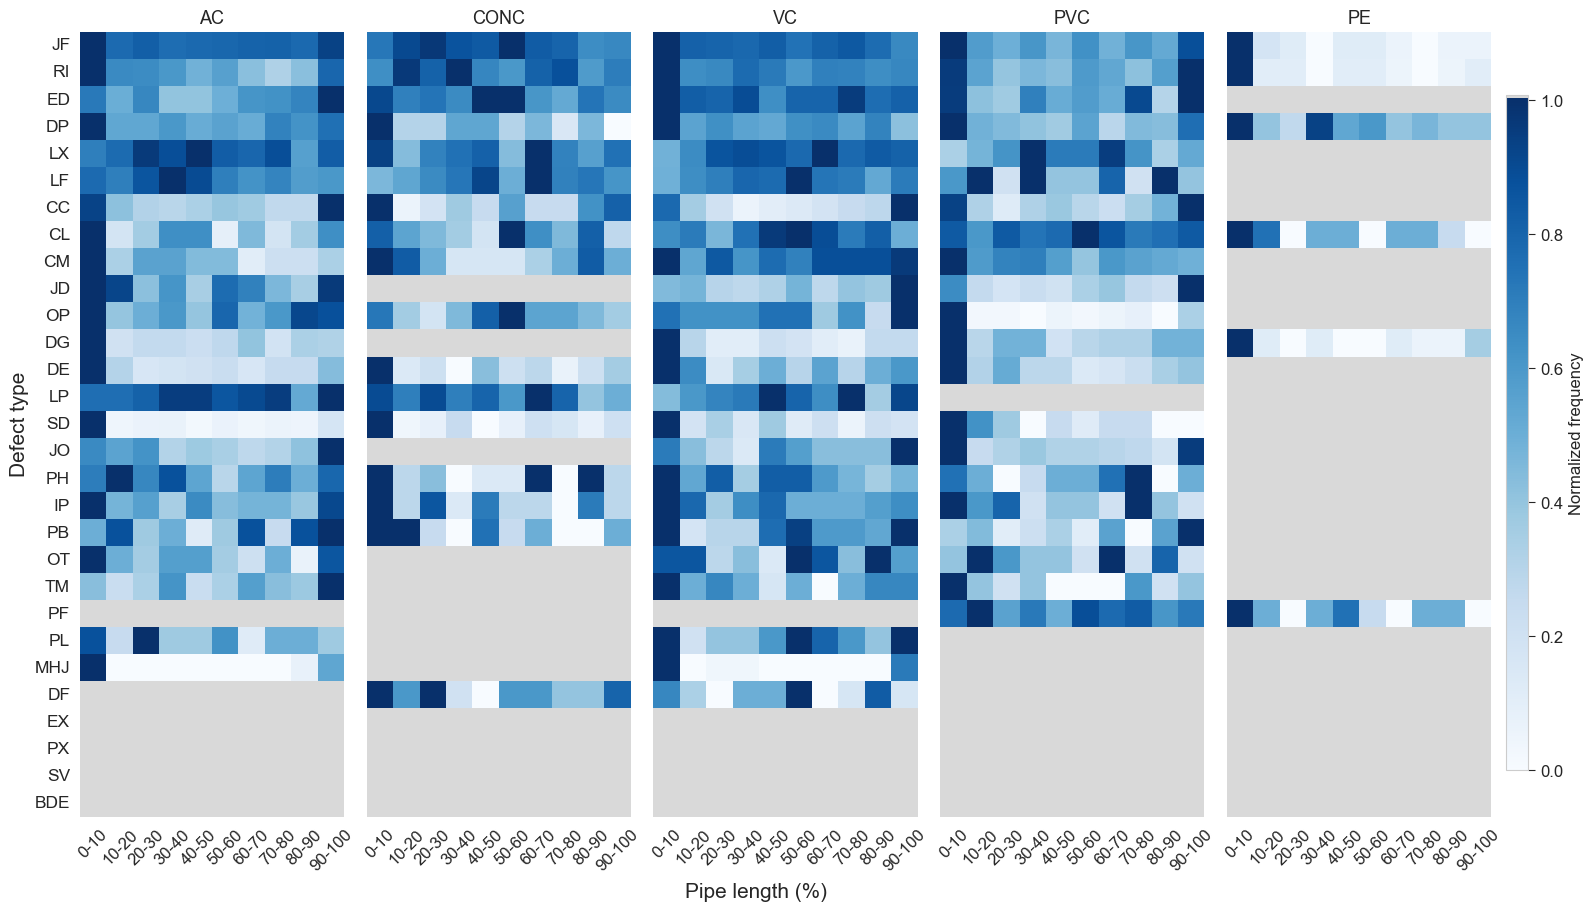

In [220]:
plot_defect_heatmaps_longitudinal(df_defects,group_col="DEFECT_TYPE",min_count=15)

## 5.6 Extent

This function analyzes the ** extent of defects** along the pipe,
using both the normalized start position and the defect length.
The output is visualized as a heatmap that shows where defects accumulate along the pipe.

- **Required inputs**:
  - The `df_defects` DataFrame (defect-level data).

- **Required columns**:
  - `DEFECT_TYPE` → the main defect type identifier.
  - `LONGITUDINAL_DISTANCE_NORMALIZED` → the normalized start distance of the defect
    (location measured from the upstream manhole, divided by total pipe length).
  - `DEFECT_LENGTH` → the normalized defect length (distance from the start
    of the defect to its end, relative to pipe length).
  - `min_count` → minimum number of defects of a given type
    (within a material) required to be shown as a colored row.
  - `resolution` → bin width for the longitudinal axis.
    For example, `0.1` means that the pipe length is split into 10% bins


- **How the extent is calculated**:
  - Each defect is placed starting at `LONGITUDINAL_DISTANCE_NORMALIZED`.
  - The extent is then covered up to `LONGITUDINAL_DISTANCE_NORMALIZED + DEFECT_LENGTH`.
  - The length of the defect is discretized into intervals of 0.1 (or chosen resolution).
  - At each interval, the defect is counted — meaning that defects spanning longer distances
    contribute multiple times along their coverage.
  - The result is **cumulative**: darker colors in the heatmap represent regions where
    multiple defects overlap or extend across the same positions.

- **Example**:
  - If a defect starts at `0.5` and has a defect length of `0.3`,
    it covers the interval from **0.5 to 0.8**.
  - The function increments defect counts for this entire segment,
    ensuring that longer defects appear more prominently in the distribution.

This method highlights **where along the pipe defects are concentrated**

In [221]:
def plot_defect_density_extent_horizontal(df, group_col='DEFECT_TYPE',          distance_col='LONGITUDINAL_DISTANCE_NORMALIZED',
                                               length_col='DEFECT_LENGTH', materials=selected_materials,
                                               min_count=10, resolution=0.1):

    """
    Plot heatmaps of extent for multiple materials in a single row.

    Parameters
    ----------
    df : pandas.DataFrame
        Long-format table of defect observations. Must include at least:
        - 'MATERIAL' : pipe material/category,
        - `group_col` (default 'DEFECT_TYPE') : defect type identifier,
        - `distance_col` (default 'LONG_DIS_NO_start2') : defect start position
          along the pipe (same units as `length_col`; typically 0–1 fraction of pipe length),
        - `length_col` (default 'DEFECT_LENGTH') : longitudinal extent/length of the defect
          along the pipe (same units as `distance_col`).
    group_col : str, default 'DEFECT_TYPE'
        Column indicating the defect type; becomes the heatmap rows.
    distance_col : str, default 'LONG_DIS_NO_start2'
        Column with the **start** position of the defect along the pipe. Expected in the
        same units as `length_col` (often normalized 0–1). The plot bins this axis.
    length_col : str, default 'DEFECT_LENGTH'
        Column with the **extent/length** of the defect along the pipe (same units as `distance_col`).
        Each defect contributes to every bin that its [start, start+length] interval overlaps.
    materials : list-like, default ['AC','CONC','VC','PVC','PE']
        Ordered list of materials to display (one subplot per material).
    min_count : int, default 0
        Minimum number of observations for a defect **within a material** to be shown as
        a colored row. Defects with fewer observations are rendered in gray (flag value 999).
    resolution : float, default 0.1
        Bin width for the longitudinal axis (in the same units as `distance_col`/`length_col`).
        For example, 0.1 creates 10% bins (0–10–…–100% when the axis is 0–1).

    """

    # ---ERROR CHECKS---

    if df is None or not isinstance(df, pd.DataFrame) or df.empty:
        print ("⚠️ Input DataFrame is missing or empty.")
        return

    required = {group_col, distance_col, length_col, 'MATERIAL'}
    missing = [c for c in required if c not in df.columns]
    if missing:
        print (f"⚠️ Missing required columns: {sorted(missing)}")
        return

    end_sum = df[distance_col] + df[length_col]
    mask_over_1 = end_sum > 1
    if mask_over_1.any():
        bad_rows = df.loc[mask_over_1, [distance_col, length_col]].copy()
        bad_rows['sum'] = bad_rows[distance_col] + bad_rows[length_col]
        examples = bad_rows.head(5).to_dict(orient='records')
        print(
            f"❌ Some defects exceed 100% of pipe length (distance + length > 100).")
        print( f"Number of problematic rows: {mask_over_1.sum()}"
        )
        return

    # --- Filter the columns only with defect_length---
    mask = df[length_col].notna() & df[distance_col].notna()
    df = df.loc[mask].copy()

    # 1. Determine global defect order
    global_counts = df[group_col].value_counts()
    ordered_defects = global_counts.index.tolist()
    hm_for_cbar = None

    # 2. Create bins (0, 0.05, 0.1, ..., max)
    max_position = (df[distance_col] + df[length_col]).max()
    grid = np.arange(0, max_position + resolution, resolution)
    segment_labels = [f'{int(grid[i]*100)}-{int(grid[i+1]*100)}' for i in range(len(grid)-1)]

    # 3. Create color map with gray for low-frequency defects
    base_cmap = plt.get_cmap('Purples', 256)
    base_colors = base_cmap(np.linspace(0, 1, 256))
    gray_color = np.array([[0.85, 0.85, 0.85, 1.0]])
    all_colors = np.vstack([base_colors, gray_color])
    final_cmap = ListedColormap(all_colors)
    bounds = np.concatenate([np.linspace(0, 1, 256), [998, 1000]])
    norm = BoundaryNorm(boundaries=bounds, ncolors=257)

    # 4. Set up figure
    fig, axes = plt.subplots(1, len(materials), figsize=(12,5), sharex=True,constrained_layout=True)

    for i, material in enumerate(materials):
        ax = axes[i]
        df_mat = df[df['MATERIAL'] == material].copy()

        # Create empty heatmap matrix
        heatmap_data = pd.DataFrame(0, index=ordered_defects, columns=segment_labels)

        # Fill matrix
        for defect in ordered_defects:
            df_def = df_mat[df_mat[group_col] == defect]

            for _, row in df_def.iterrows():
                start = row[distance_col]
                end = start + row[length_col]

                for j in range(len(grid) - 1):
                    if grid[j] < end and grid[j + 1] > start:
                        heatmap_data.loc[defect, segment_labels[j]] += 1

        # Normalize and gray-out low-count defects
        defect_counts = df_mat[group_col].value_counts().to_dict()
        heatmap_normalized = heatmap_data.div(heatmap_data.max(axis=1), axis=0)


        for defect in ordered_defects:
            if defect_counts.get(defect, 0) < min_count:
                heatmap_normalized.loc[defect, :] = 999

        # Plot
        hm= sns.heatmap(
        heatmap_normalized,
        cmap=final_cmap,
        norm=norm,
        ax=ax,
        xticklabels=True,
        yticklabels=(i == 0),
        cbar=False)

        ax.set_title(material, fontsize=13)

        ax.tick_params(axis='x', labelsize=10,rotation=45)
        ax.tick_params(axis='y', labelsize=11,rotation=0)

    # Colorbar on the right of the last axis
    from matplotlib.cm import ScalarMappable

    mappable = hm_for_cbar.collections[0] if hm_for_cbar is not None else ScalarMappable(norm=norm, cmap=final_cmap)
    if hm_for_cbar is None:
        mappable.set_array([])

    # [x0, y0, width, height]
    cax = fig.add_axes([1, 0.15, 0.015, 0.75])
    cbar = fig.colorbar(mappable, cax=cax)
    cbar.set_label("Normalized frequency", fontsize=11)
    cbar.set_ticks([0, 0.2,0.4,0.6,0.8, 1.0])
    cbar.ax.tick_params(labelsize=9,length=5)
    cbar.ax.minorticks_off()
    fig.supxlabel("Pipe length (%)", fontsize=12)
    fig.supylabel("Defect type", fontsize=12)
    plt.savefig(output_dir / "7.Extent.png", dpi=200, bbox_inches="tight")
    plt.show()


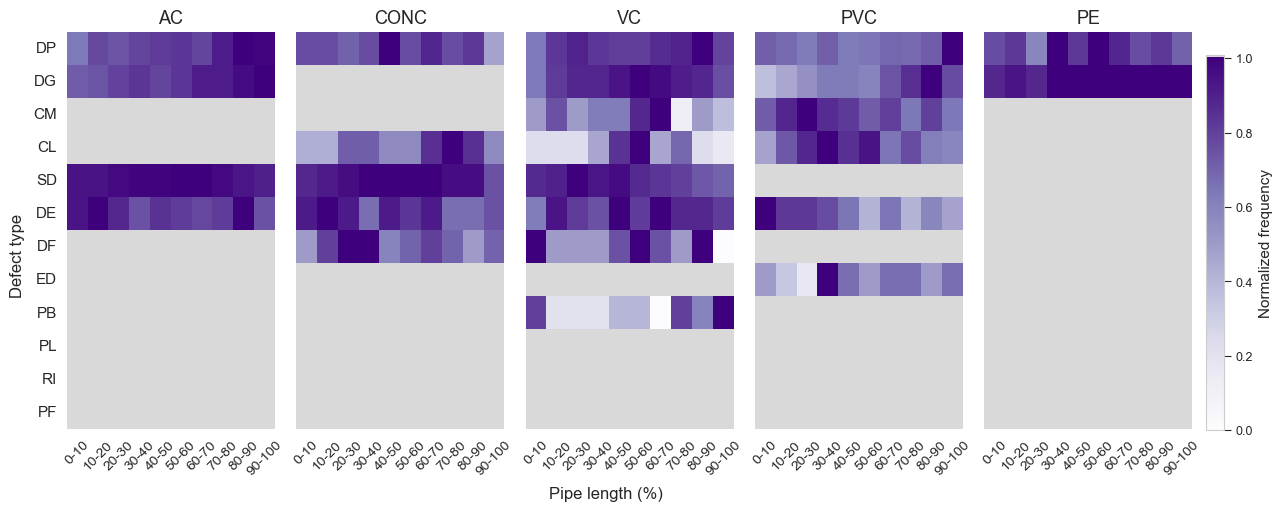

In [222]:
plot_defect_density_extent_horizontal(df_defects,group_col='DEFECT_TYPE')

## 5.7 Clock reference

This function analyzes the **circumferential position of the defects types**

- **Required inputs**:
  - The `df_defects` DataFrame (defect-level data).

- **Required columns**:
  - `DEFECT_TYPE` → the main defect type identifier.
  - `CLOCK_REFERENCE_START` → the start of the defect position. It must be a number between 1 and 12.
  - `CLOCK_REFERENCE_END` → the end of the defect position. It must be a number between 1 and 12.
  - `MATERIAL`→ to group the defects.

- **Additional parameter**:
  - `materials` → they are the materials to be included in the analysis. By default is `selected_materials`.
  - `min_count` → the minimum number of defects of a given type required
    for it to be included in the heatmap.

In [223]:
def plot_defect_position_heatmaps(df, materials=selected_materials, min_count=15):
    """
    Plot heatmaps of defect positions (clock reference) for multiple materials in a single row.

    Parameters:
    df: The pandas DataFrame containing defect data. Must include the columns:
    'MATERIAL', 'CLOCK_REFERENCE_START', 'CLOCK_REFERENCE_END', 'DEFECT_TYPE'.
    Each row represents a defect instance.

    materials: List of material names (strings) to include in the heatmaps.
    Each material will be plotted in a separate subplot.

    min_count: Minimum number of defect occurrences required for a defect type to be considered
    representative. Defect types with fewer occurrences are marked as gray in the heatmap
    to indicate insufficient data. Default is 15.
    """

    required_cols = ['MATERIAL', 'CLOCK_REFERENCE_START', 'CLOCK_REFERENCE_END', 'DEFECT_TYPE']
    if df is None or df.empty:
        raise ValueError("The DataFrame is empty or does not exist.")
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"⚠️ Required column '{col}' is missing from the DataFrame.")

    # --- Fixed figure size and colormap ---
    figsize = (13, 6)
    cmap_base = 'Greens'

    # --- Helper function to compute position ranges from clock start and end ---
    def position_range(start, end):
        if pd.isnull(start) or pd.isnull(end):
            return []
        start = int(start)
        end = int(end)
        if start < end:
            return list(range(start, end + 1))
        elif start == end:
            return list(range(1, end + 1))
        else:
            return list(range(start, 13)) + list(range(1, end + 1))

    # --- Filter dataframe to include only rows with valid clock references ---
    df_def_pos = df[
        (df['CLOCK_REFERENCE_START'] != 0) &
        (df['CLOCK_REFERENCE_END'] != 0)
    ].copy()

    # --- Convert DEFECT_TYPE to string to ensure consistency ---
    df_def_pos['DEFECT_TYPE'] = df_def_pos['DEFECT_TYPE'].astype(str)

    # --- Set order of defects according to their frequency ---
    order_defects_pos = df_def_pos['DEFECT_TYPE'].value_counts().index.tolist()

    # --- Create subplots: 1 row x len(materials) columns ---
    n = len(materials)
    fig, axes = plt.subplots(1, n, figsize=figsize, sharey=True)
    if n == 1:
        axes = [axes]
    axes_flat = axes.flatten()
    material_axes = axes_flat[:n]

    # --- Create colormap with extra gray for "not enough data" ---
    base_cmap = plt.get_cmap(cmap_base, 256)
    base_colors = base_cmap(np.linspace(0, 1, 256))
    gray_color = np.array([[0.85, 0.85, 0.85, 1.0]])
    all_colors = np.vstack([base_colors, gray_color])
    final_cmap = ListedColormap(all_colors)
    bounds = np.concatenate([np.linspace(0, 1, 256), [998, 1000]])
    norm = BoundaryNorm(boundaries=bounds, ncolors=257)

    # --- Loop over each material ---
    for i, (material, ax) in enumerate(zip(materials, material_axes)):

        # --- Filter dataframe for this material ---
        df_mat = df_def_pos[df_def_pos['MATERIAL'] == material].copy()

        if df_mat.empty:
            ax.axis('off')
            ax.set_title(f"{material}\n(no data)")
            continue

        # --- Calculate positions using helper function ---
        df_mat["POSITION"] = df_mat.apply(
            lambda row: position_range(row["CLOCK_REFERENCE_START"], row["CLOCK_REFERENCE_END"]), axis=1
        )

        # --- Explode positions for counting ---
        df_exploded = df_mat.explode("POSITION")

        # --- Count frequency and normalize ---
        freq = df_exploded.groupby(["DEFECT_TYPE", "POSITION"]).size().reset_index(name="FREQ")
        position_table = freq.pivot(index="DEFECT_TYPE", columns="POSITION", values="FREQ").fillna(0)
        position_normalized_table = position_table.div(position_table.max(axis=1), axis=0).fillna(0)

        # --- Mark defects with insufficient data ---
        defect_counts = df_mat['DEFECT_TYPE'].value_counts().to_dict()
        not_representative = [d for d in order_defects_pos if defect_counts.get(d, 0) < min_count]

        for defect in not_representative:
            if defect not in position_normalized_table.index:
                position_normalized_table.loc[defect] = 0
            position_normalized_table.loc[defect] = 999

        # --- Reindex by overall defect order ---
        position_normalized_table = position_normalized_table.reindex(order_defects_pos).fillna(0)

        # --- Plot heatmap ---
        hm = sns.heatmap(
            position_normalized_table,
            cmap=final_cmap,
            norm=norm,
            ax=ax,
            cbar=False,
            annot=False,
            fmt=".0f",
            linewidths=0,
            linecolor='gray'
        )

        # --- Titles and axis labels ---
        ax.set_title(material)
        if i == 0:
            ax.set_ylabel("Defect type", fontsize=12)
        else:
            ax.set_ylabel("")
        ax.set_xlabel("")
        ax.set_xticks(np.arange(len(position_normalized_table.columns)) + 0.5)
        ax.set_xticklabels(position_normalized_table.columns, fontsize=9, rotation=0)

    # --- Add separate colorbar axis to the right of the last plot ---
    divider = make_axes_locatable(axes[-1])
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(hm.collections[0], cax=cax)
    cbar.set_label("Normalized frequency", fontsize=11)
    cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    cbar.ax.tick_params(labelsize=9, length=5)
    cbar.ax.minorticks_off()

    # --- General title and x-axis label ---
    fig.supxlabel("Clock reference", fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(output_dir / "8.ClockReference.png", dpi=200, bbox_inches="tight")
    plt.show()

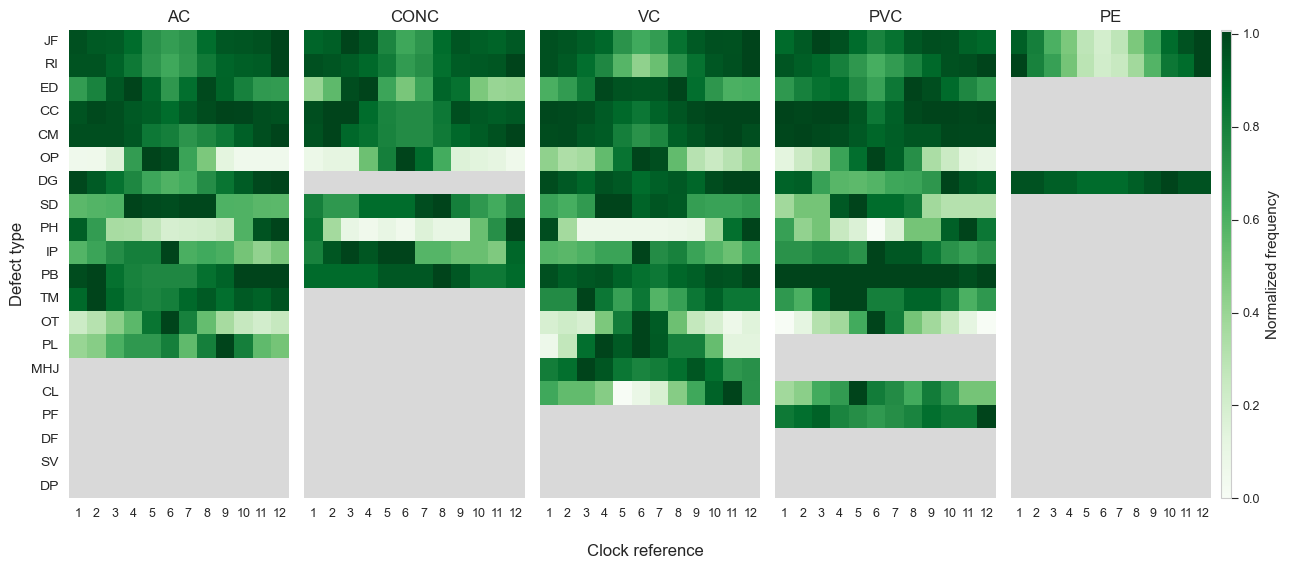

In [224]:
plot_defect_position_heatmaps(df=df_defects)

## 5.8 Defect correlation

This function creates a **correlation matrix of the defects types**

- **Required inputs**:
  - The `df_defects` DataFrame (defect-level data).

- **Required columns**:
  - `DEFECT_TYPE` → the defect type identifier.

In [225]:
def plot_defect_type_correlation(df):
    """
    --- Plot correlation matrix between defect types based on their presence in the same pipe ---

    Parameters:
    df: pandas DataFrame containing defect data. Must include the columns:
    'PIPE_ID' and 'DEFECT_TYPE'.
    Each row represents a defect instance.
    """

    # --- Check if DataFrame exists and is not empty ---
    if df is None or df.empty:
        raise ValueError("⚠️ The DataFrame 'df' is empty or does not exist.")

    # --- Check if required columns exist ---
    required_cols = ['PIPE_ID', 'DEFECT_TYPE']
    for col in required_cols:
        if col not in df.columns:
            raise ValueError(f"⚠️ Required column '{col}' is missing from the DataFrame.")

    # --- Order defect types by frequency ---
    order_defects = df['DEFECT_TYPE'].value_counts().index.tolist()

    # --- Create a presence matrix of defects per pipe ---
    count_defects = pd.crosstab(df['PIPE_ID'], df['DEFECT_TYPE'])
    presence_defects = (count_defects > 0).astype(int)

    # --- Compute correlation matrix ---
    corr_matrix = presence_defects.corr(method='pearson')
    corr_matrix = corr_matrix.loc[order_defects, order_defects]

    # --- Plot heatmap ---
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix,
        annot=False,
        cmap='coolwarm',
        fmt=".2f",
        vmin=-1,
        vmax=1,
    )
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.ylabel("Defect type")
    plt.xlabel("Defect type")
    plt.tight_layout()
    plt.savefig(output_dir / "9.Correlation.png", dpi=200, bbox_inches="tight")
    plt.show()

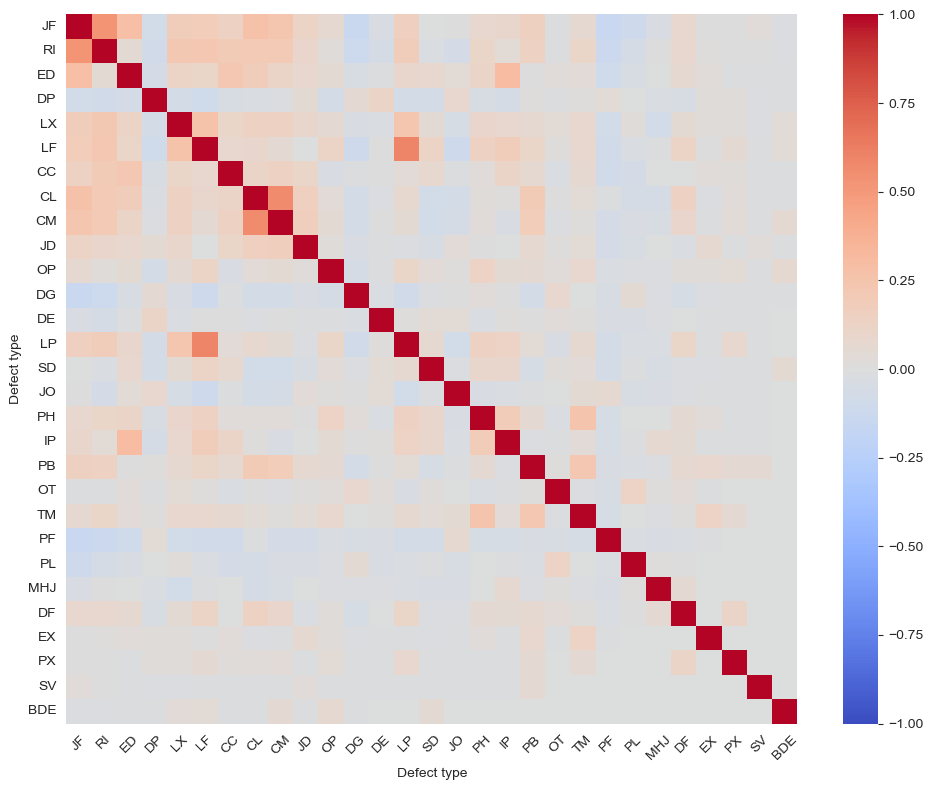

In [226]:
plot_defect_type_correlation(df=df_defects)